<a href="https://colab.research.google.com/github/Shaunak-Mukherjee/ME697-advanced-scientific-machine-learning/blob/main/ME697_06_homework_Shaunak_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jaxtyping
!pip install numpyro
!pip install blackjax
!pip install equinox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.8/365.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 kB 3.6 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");
import optax
import equinox as eqx
from jax import value_and_grad
from tqdm import trange
from typing import Callable
import blackjax
import jax
import jax.numpy as jnp
from jax import random
import pandas as pd
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from jax import vmap
from jax import random as jrandom
from jax._src.prng import PRNGKeyArray
from jax.numpy import ndarray as Array
from jaxtyping import Array, Float, PyTree, PRNGKeyArray
from jax.flatten_util import ravel_pytree
import jax.random as jr

# Homework 6

## References

+ Module 5: Inverse problems in deterministic scientifc models
   - Inverse problems basics
   - Sampling from posteriors
   - Variational inference
   - Deterministic, finite-dimensional dynamical systems
   <!-- - PDE-constrained inverse problems -->
   <!-- - Purely data-driven learning of dynamical systems -->

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

## Student details

+ **First Name: Shaunak**
+ **Last Name: Mukherjee**
+ **Email: mukher86@purdue.edu**
+ **Used generative AI to complete this assignment (Yes/No): Yes**
+ **Which generative AI tool did you use (if applicable)?: chatGPT**

# Problem 1 - Why does the Metropolis algorithm work

The objective of this problem is to understand why the Metropolis algorithm works.

Consider a Markov chain $x_n$ with transition probabilities $p(x_{n+1}|x_n)$ and a probability density $\pi(x)$.
We say that $x_n$ has stationary distribution $\pi$ if:

$$
\pi(x_{n+1}) = \int p(x_{n+1}|x_n)\pi(x_n)dx_n.
$$

Intuitively, we can think of the equation above as follows.
If we, somehow, sample $x_n$ from $\pi$ and then sample $x_{n+1}$ from the transition probability $p(x_{n+1}|x_n)$, then $x_{n+1}$ is also a sample from $\pi(x)$.
It is like once we have a sample $\pi$ sampling the Markov chain keeps giving us samples from $\pi$.

We say that the Markov chain $x_n$ is *reversible* with respect to $\pi$ (equivalently, satisfies the *detailed balance* condition) with respect to $\pi$, if:

$$
p(x_{n+1}|x_n)\pi(x_n) = p(x_n|x_{n+1})\pi(x_{n+1}).
$$

Intuitively, this condition means that going from sampling $x_{n}$ from $\pi$ and transition to $x_{n+1}$ has the same probability as doing the inverse.

## Part A - Prove that detailed balance implies stationarity

Suppose that the Markov chain $x_n$ satisfies the detailed balance condition with respect to $\pi$. Prove that $\pi$ is a stationary distribution of the Markov chain.

**Answer:**




To prove we show that:
$$\pi(x') = \int p(x'|x)\pi(x)\, dx$$

We start from the RHS of the stationarity condition:
$$\int p(x'|x)\pi(x)\, dx$$

Now apply the detailed balance condition inside the integral,
$$= \int p(x|x') \pi(x')\, dx$$

Since $\pi(x')$ is constant w.r.t. the integration variable $x$, we can get,
$$= \pi(x') \int p(x|x')\, dx$$

Since  $\int p(x|x')\, dx = 1$, because $p(\cdot|x')$ is a valid conditional probability distribution over $x$.
$$= \pi(x') \cdot 1 = \pi(x')$$

Thus:
$$\int p(x'|x)\pi(x)\, dx = \pi(x')$$ *Q.E.D*

## Part B - The Metropolis-Hastings transition kernel

Let $\pi(x)$ be the target distribution.
Let $q(\tilde{x}_{n+1}|x_n)$ be a proposal distribution of the Metropolis-Hastings algorithm.

The Metropolis-Hastings algorithm results in a Markov chain $x_n$ defined as follows:

+ Sample $\tilde{x}_{n+1} \sim q(\tilde{x}_{n+1}|x_n)$
+ Accept $\tilde{x}_{n+1}$ and set $x_{n+1} = \tilde{x}_{n+1}$ with probability $\alpha(x_n, \tilde{x}_{n+1})$
+ Reject $\tilde{x}_{n+1}$ and set $x_{n+1} = x_n$ with probability $1-\alpha(x_n, \tilde{x}_{n+1}),$


where

$$
\alpha(x_n, \tilde{x}_{n+1}) = \min\left(1, \frac{\pi(\tilde{x}_{n+1})q(x_n|\tilde{x}_{n+1})}{\pi(x_n)q(\tilde{x}_{n+1}|x_n)}\right).
$$

The purpose of this problem is to show that the transition kernel of the resulting Markov chain satisfies the detailed balance condition with respect to $\pi$, and thus $\pi$ is its stationary distribution.

### B.I - Derive the transition kernel of the Metropolis algorithm

Show that the transition kernel of the Metropolis algorithm is:

$$
p(x_{n+1}|x_n) = \alpha(x_n, x_{n+1})q(x_{n+1}|x_n) +
\delta(x_{n+1} - x_n)\int (1 - \alpha(x_n, \tilde{x}_{n+1}))q(\tilde{x}_{n+1}|x_n)d\tilde{x}_{n+1},
$$

where $\delta$ is the Dirac delta function.

Hints:

+ Introduce an intermediate variable $i$ that takes the value $1$ if the proposed move is accepted and $0$ otherwise. That is:

$$
i | x_n, \tilde{x}_{n+1} \sim \begin{cases}
    1 & \text{with probability } \alpha(x_n, \tilde{x}_{n+1}) \\
    0 & \text{with probability } 1 - \alpha(x_n, \tilde{x}_{n+1}).
\end{cases}
$$

+ Write the joint distribution $p(x_{n+1}| i, x_n, \tilde{x}_{n+1})$ in terms of $i$ and $\tilde{x}_{n+1}$:

$$
p(x_{n+1}| i, x_n, \tilde{x}_{n+1}) = [\delta(x_{n+1} - \tilde{x}_{n+1})]^i [\delta(x_{n+1} - x_n)]^{1-i}.
$$

+ Use the sum rule to express $p(x_{n+1}|x_n)$ in terms of $i$ and $\tilde{x}_{n+1}$:

$$
p(x_{n+1}|x_n) = \int \sum_i p(x_{n+1}| i, x_n, \tilde{x}_{n+1}) p(i | x_n, \tilde{x}_{n+1}) q(\tilde{x}_{n+1}|x_n) d\tilde{x}_{n+1}.
$$

+ Use the definition of the Dirac delta function to simplify the expression.




**Answer:**

Starting from the sum rule:
$$
p(x_{n+1}|x_n) = \int \sum_i p(x_{n+1}| i, x_n, \tilde{x}_{n+1}) p(i | x_n, \tilde{x}_{n+1}) q(\tilde{x}_{n+1}|x_n) d\tilde{x}_{n+1}
$$
Substituting the probabilities above we get,
$$
p(x_{n+1}|x_n) = \int \left[ \delta(x_{n+1} - \tilde{x}_{n+1}) \alpha(x_n, \tilde{x}_{n+1}) + \delta(x_{n+1} - x_n) (1 - \alpha(x_n, \tilde{x}_{n+1})) \right] q(\tilde{x}_{n+1}|x_n) d\tilde{x}_{n+1}
$$
Splitting the integral and using the property of the Dirac delta function:
$$
p(x_{n+1}|x_n) = \int \delta(x_{n+1} - \tilde{x}_{n+1}) \alpha(x_n, \tilde{x}_{n+1}) q(\tilde{x}_{n+1}|x_n) d\tilde{x}_{n+1} + \int \delta(x_{n+1} - x_n) (1 - \alpha(x_n, \tilde{x}_{n+1})) q(\tilde{x}_{n+1}|x_n) d\tilde{x}_{n+1}
$$
$$
p(x_{n+1}|x_n) = \alpha(x_n, x_{n+1})q(x_{n+1}|x_n) + \delta(x_{n+1} - x_n)\int (1 - \alpha(x_n, \tilde{x}_{n+1}))q(\tilde{x}_{n+1}|x_n)d\tilde{x}_{n+1}.
$$
Q.E.D

### B.II - Show that the transition kernel satisfies the detailed balance condition

Show that the transition kernel of the Metropolis algorithm satisfies the detailed balance condition with respect to $\pi$, and thus $\pi$ is its stationary distribution.
Mathematically, you need to show that:

$$
p(x_{n+1}|x_n) \pi(x_n) = p(x_n|x_{n+1}) \pi(x_{n+1}).
$$

Hints:

+ First prove that $a(x_n, x_{n+1})q(x_{n+1}|x_n)\pi(x_n) = a(x_{n+1}, x_n)q(x_n|x_{n+1})\pi(x_{n+1})$.
+ Then, reuse the result above the symmetry of the Dirac delta function.

**Answer:**
We start by proving the key identity

$$
\alpha(x_n, x_{n+1}) q(x_{n+1} | x_n) \pi(x_n) = \alpha(x_{n+1}, x_n) q(x_n | x_{n+1}) \pi(x_{n+1})
$$

We consider two cases



**Case 1**: When

$$
\frac{\pi(x_{n+1}) q(x_n | x_{n+1})}{\pi(x_n) q(x_{n+1} | x_n)} \leq 1,
$$

then

$$
\alpha(x_n, x_{n+1}) = \frac{\pi(x_{n+1}) q(x_n | x_{n+1})}{\pi(x_n) q(x_{n+1} | x_n)} \quad \text{and} \quad \alpha(x_{n+1}, x_n) = 1.
$$

Therefore,

$$
\alpha(x_n, x_{n+1}) q(x_{n+1} | x_n) \pi(x_n) = \pi(x_{n+1}) q(x_n | x_{n+1}) = \alpha(x_{n+1}, x_n) q(x_n | x_{n+1}) \pi(x_{n+1}).
$$


**Case 2**: When

$$
\frac{\pi(x_{n+1}) q(x_n | x_{n+1})}{\pi(x_n) q(x_{n+1} | x_n)} \geq 1,
$$

then

$$
\alpha(x_n, x_{n+1}) = 1 \quad \text{and} \quad \alpha(x_{n+1}, x_n) = \frac{\pi(x_n) q(x_{n+1} | x_n)}{\pi(x_{n+1}) q(x_n | x_{n+1})}.
$$

Thus,

$$
\alpha(x_n, x_{n+1}) q(x_{n+1} | x_n) \pi(x_n) = q(x_{n+1} | x_n) \pi(x_n)
= \alpha(x_{n+1}, x_n) q(x_n | x_{n+1}) \pi(x_{n+1}).
$$



So based on two cases,

$$
\alpha(x_n, x_{n+1}) q(x_{n+1} | x_n) \pi(x_n) = \alpha(x_{n+1}, x_n) q(x_n | x_{n+1}) \pi(x_{n+1}).
$$


Now consider the full transition kernel,

$$
p(x_{n+1} | x_n) =
\alpha(x_n, x_{n+1}) q(x_{n+1} | x_n) +
\delta(x_{n+1} - x_n) \int \left(1 - \alpha(x_n, \tilde{x})\right) q(\tilde{x} | x_n) d\tilde{x}.
$$

Multiplying both sides by $\pi(x_n)$:

$$
p(x_{n+1} | x_n) \pi(x_n) =
\alpha(x_n, x_{n+1}) q(x_{n+1} | x_n) \pi(x_n) +
\delta(x_{n+1} - x_n) \pi(x_n) \int \left(1 - \alpha(x_n, \tilde{x})\right) q(\tilde{x} | x_n) d\tilde{x}.
$$

We already showed that,

$$
\alpha(x_n, x_{n+1}) q(x_{n+1} | x_n) \pi(x_n) =
\alpha(x_{n+1}, x_n) q(x_n | x_{n+1}) \pi(x_{n+1}).
$$

Also, the Dirac delta function is symmetric

$$
\delta(x_{n+1} - x_n) = \delta(x_n - x_{n+1}),
$$

and the integral term is symmetric in the same way. Therefore, both sides of the detailed balance condition match.

# Problem 2 - Mathematics of Variational Inference

## Part A - Parameterization of a covariance matrix

The purpose is to show that the commonly used rank-$k$ parameterization of the covariance matrix is indeed positive definite.

Let $k$ be a positive integer, and $\lambda_1, \dots, \lambda_k$ be real numbers.
Let $d$ be another positive integer (the dimension of the covariance matrix) with $d \geq k$.
Let $u_1, \dots, u_k$ be $d$-dimensional vectors, not necessarily orthogonal, but linearly independent.

Consider the following matrix:

$$
\Sigma = \sum_{i=1}^k e^{\lambda_i} u_i u_i^\top.
$$

### A.I - Show that $\Sigma$ is positive semi-definite.

Hint: You need to show that for any non-zero vector $x \in \mathbb{R}^d$, the quadratic form $x^\top \Sigma x \geq 0$.

**Answer:**
*Your answer here*


**Answer**

We start from quadratic form

$$
x^\top \Sigma x = x^\top \left( \sum_{i=1}^k e^{\lambda_i} u_i u_i^\top \right) x
$$

Because the sum is linear, we can write:

$$
= \sum_{i=1}^k e^{\lambda_i} x^\top u_i u_i^\top x
$$

Since $x^\top u_i u_i^\top x = (u_i^\top x)^2$,

$$
= \sum_{i=1}^k e^{\lambda_i} (u_i^\top x)^2
$$

Each term in the sum is
* $e^{\lambda_i} > 0$,
* $(u_i^\top x)^2 \geq 0$,

So every term in the sum is **non-negative**, and hence:

$$
x^\top \Sigma x = \sum_{i=1}^k e^{\lambda_i} (u_i^\top x)^2 \geq 0
\quad \text{for all } x \in \mathbb{R}^d
$$

Since $x^\top \Sigma x \geq 0$ for all $x$, the matrix $\Sigma$ is positive semi-definite. *Q.E.D*


### A.II - Numerical exploration of a rank-$k$ covariance matrix

Set $d=100$ and $k=10$.
Randomly generate $u_1, \dots, u_k$ from the standard normal distribution.
Randomly generate $\lambda_1, \dots, \lambda_k$ from the standard normal distribution.
Write Jax code (without a loop) to form the matrix $\Sigma$ as defined above.
Generate a random $\Sigma$ and plot the eigenvalues.
Are they all non-negative?
What is the determinant of $\Sigma$?


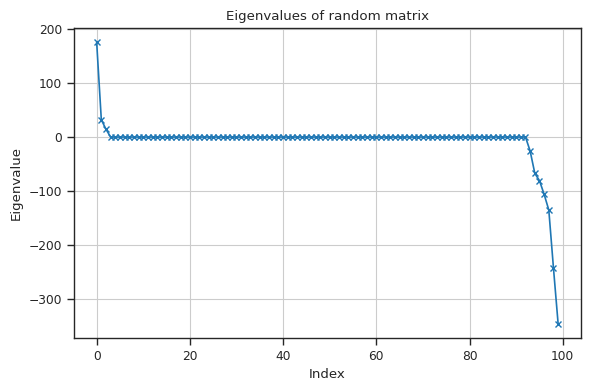

Determinant ≈ 0? True
Are all eigenvalues non-negative? False
Minimum eigenvalue: -346.30496
Determinant: -0.0


In [3]:
# Parameters
d = 100
k = 10
key = jr.PRNGKey(0)

# Generate random u_i ~ N(0, I) of shape (k, d)
key_u, key_l = jr.split(key)

U = jr.normal(key_u, (k, d))

# Generate random lambda_i ~ N(0, 1) of shape (k,)
L = jr.normal(key_l, (k,))

# Generate a random matrix
outer_products = jnp.einsum('ki,kj->kij', U, U)
sigma_rand = jnp.einsum('k,kij->ij', L, outer_products)

# Eigen decomposition
eigvals = jnp.linalg.eigvalsh(sigma_rand)

# Plot eigenvalues
plt.figure(figsize=(6, 4))
plt.plot(jnp.flip(jnp.sort(eigvals)), marker='x')
plt.title("Eigenvalues of random matrix")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.tight_layout()
plt.show()

# Determinant
det = jnp.linalg.det(sigma_rand)
print("Determinant ≈ 0?", jnp.isclose(det, 0.0, atol=1e-8))
print("Are all eigenvalues non-negative?", jnp.all(eigvals >= 0))
print("Minimum eigenvalue:", eigvals.min())
print("Determinant:", det)

### A.III - Low-rank approximation that is actually positive definite

In the previous part, we saw that the rank-$k$ approximation is not positive definite.
To fix it, we typically use this parameterization instead:

$$
\Sigma = \sum_{i=1}^k \lambda_i u_i u_i^\top + \text{diag}(e^{\theta_1}, \dots, e^{\theta_d}),
$$

where $\theta_1, \dots, \theta_d$ are real numbers.

Modify your Jax code and generate a random $\Sigma$ using this parameterization.
Plot the eigenvalues.
Are they all non-negative?
What is the determinant of $\Sigma$?

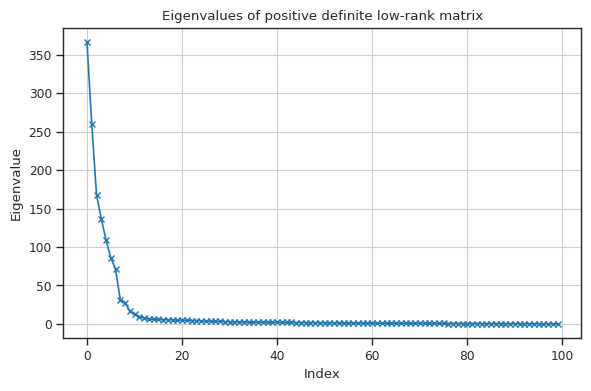

Determinant of positive definite matrix: 1.3735988e+26
Are all eigenvalues non-negative for positive definite matrix? True
Minimum eigenvalue: 0.106684394


In [4]:
# Generate random theta_i ~ N(0, 1) of shape (d,)
key_theta, key = jr.split(key)
theta = jr.normal(key_theta, (d,))

# Create the diagonal matrix
diag_part = jnp.diag(jnp.exp(theta))

# Generate a random matrix using the new parameterization
sigma_pd = jnp.einsum('k,kij->ij', jnp.abs(L), outer_products) + diag_part

# Eigen decomposition
eigvals_pd = jnp.linalg.eigvalsh(sigma_pd)

# Plot eigenvalues
plt.figure(figsize=(6, 4))
plt.plot(jnp.flip(jnp.sort(eigvals_pd)), marker='x')
plt.title("Eigenvalues of positive definite low-rank matrix")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.tight_layout()
plt.show()

# Determinant
det_pd = jnp.linalg.det(sigma_pd)
print("Determinant of positive definite matrix:", det_pd)
print("Are all eigenvalues non-negative for positive definite matrix?", jnp.all(eigvals_pd >= 0))
print("Minimum eigenvalue:", eigvals_pd.min())

## Part B - Multi-point convexity

Let $f:\mathbb{R}^d \to \mathbb{R}$ be a convex function.
Let $x_1, \dots, x_n \in \mathbb{R}^d$ be $n$ points.
Let $w_1, \dots, w_n \in \mathbb{R}$ be $n$ weights.

Show that:

$$
f\left(\sum_{i=1}^n w_i x_i\right) \leq \sum_{i=1}^n w_i f(x_i).
$$

Hint: Use the definition of convexity and induction.

**Answer:**
*Your answer here*



When **($n = 2$)**,


$$
f(w_1 x_1 + w_2 x_2) \leq w_1 f(x_1) + w_2 f(x_2).
$$

The result should hold for $n = k$, i.e.,  
If $\sum_{i=1}^k w_i = 1$, then
$$
f\left(\sum_{i=1}^k w_i x_i\right) \leq \sum_{i=1}^k w_i f(x_i).
$$

Now consider $n = k+1$. Let weights $w_1, \dots, w_{k+1}$ satisfy $\sum_{i=1}^{k+1} w_i = 1$,
$$
\alpha = \sum_{i=1}^k w_i, \quad \beta = w_{k+1}, \quad \text{so that } \alpha + \beta = 1.
$$

Define
$$
y = \frac{1}{\alpha} \sum_{i=1}^k w_i x_i,
$$
which is a convex combination of $x_1 \dots x_k$. Then,
$$
\sum_{i=1}^{k+1} w_i x_i = \alpha y + \beta x_{k+1}.
$$

By convexity of $f$,
$$
f(\alpha y + \beta x_{k+1}) \leq \alpha f(y) + \beta f(x_{k+1}).
$$

By the inductive hypothesi,
$$
f(y) \leq \frac{1}{\alpha} \sum_{i=1}^k w_i f(x_i) \quad \Rightarrow \quad \alpha f(y) \leq \sum_{i=1}^k w_i f(x_i).
$$

So:
$$
f\left(\sum_{i=1}^{k+1} w_i x_i\right) \leq \sum_{i=1}^k w_i f(x_i) + w_{k+1} f(x_{k+1}) = \sum_{i=1}^{k+1} w_i f(x_i).
$$

So
by induction, for all $n \geq 2$,
$$
f\left(\sum_{i=1}^n w_i x_i\right) \leq \sum_{i=1}^n w_i f(x_i). \quad
$$


## Part C - Jensen's inequality

Let $f:\mathbb{R}^d \to \mathbb{R}$ be a convex function that is continuous.
Let $X$ be a random variable with values in $\mathbb{R}^d$.

Show that:

$$
f(\mathbb{E}[X]) \leq \mathbb{E}[f(X)].
$$

Hint: Use Part B and the law of large numbers.

**Answer:**
*Your answer here*


**Answer:**

Let $X_1\dots, X_n$ be i.i.d. samples from the distribution of $X$. By the law of large numbers,
$$
\frac{1}{n} \sum_{i=1}^n X_i \xrightarrow{} \mathbb{E}[X],
$$
and
$$
\frac{1}{n} \sum_{i=1}^n f(X_i) \xrightarrow{} \mathbb{E}[f(X)].
$$


For each finite $n$, we know from Part B that,
$$
f\left( \frac{1}{n} \sum_{i=1}^n X_i \right) \leq \frac{1}{n} \sum_{i=1}^n f(X_i).
$$


Since $f$ is continuous, we can pass the limit inside:
$$
\lim_{n \to \infty} f\left( \frac{1}{n} \sum_{i=1}^n X_i \right) = f\left( \lim_{n \to \infty} \frac{1}{n} \sum_{i=1}^n X_i \right) = f(\mathbb{E}[X]),]$$
and from the law of large numbers:
$$
\lim_{n \to \infty} \frac{1}{n} \sum_{i=1}^n f(X_i) = \mathbb{E}[f(X)].
$$

Taking the limit on both sides of the inequality:

$$
f(\mathbb{E}[X]) \leq \mathbb{E}[f(X)].
$$
Hence Q.E.D
$$
f(\mathbb{E}[X]) \leq \mathbb{E}[f(X]).
$$

## Part D - Non-negativity of the KL divergence

Let $p$ and $q$ be two probability distributions on $\mathbb{R}^d$.
Show that the KL divergence $D_{KL}(p\|q)$ is always non-negative.

Hint: Use the fact that $-\log$ is a convex function and Jensen's inequality.

**Answer:**
*Your answer here*

**Answer**

We can express KL divergence as an expectation under $p$
$$
D_{KL}(p \| q) = \mathbb{E}_{x \sim p} \left[ \log \frac{p(x)}{q(x)} \right].
$$

A random variable
$$
Z(x) = \frac{q(x)}{p(x)}.
$$

Then,
$$
\log \frac{p(x)}{q(x)} = -\log Z(x).
$$

So:
$$
D_{KL}(p \| q) = \mathbb{E}_{x \sim p} \left[ -\log \left( \frac{q(x)}{p(x)} \right) \right] = \mathbb{E}_{x \sim p}[-\log Z(x)].
$$


The function $-\log$ is convex on $(0, \infty)$. By Jensen’s inequality:
$$
\mathbb{E}_{x \sim p}[-\log Z(x)] \geq -\log \mathbb{E}_{x \sim p}[Z(x)].
$$
Since,
$$
\mathbb{E}_{x \sim p}[Z(x)] = \mathbb{E}_{x \sim p} \left[ \frac{q(x)}{p(x)} \right] = \int p(x) \cdot \frac{q(x)}{p(x)} \, dx = \int q(x) \, dx = 1.
$$

Therefore,
$$
D_{KL}(p \| q) = \mathbb{E}_{x \sim p}[-\log Z(x)] \geq -\log 1 = 0.
$$
*Q.E.D*



<br>

# Problem 3 - Calibrating a pharmacokinetic model

A pharmacokinetic (PK) compartment model is a set of ordinary differential equations that describe drug transport in the body.
Typically, the body is divided into separate "compartments" (e.g., blood, peripheral tissues) and the transfer of the drug between these compartments is assumed to follow first-order kinetics.
Consider the following two-compartment model for an *intravenous (IV) bolus* administered drug:

$$
\begin{align*}
\frac{dc_1}{dt} &= - k_{12} c_1 + k_{21} c_2\\
\frac{dc_2}{dt} &= k_{12} c_1 - (k_{21} + k_d) c_2 \\
c_1(0) &= \frac{m_\text{dose}}{V} \\
c_2(0) &= 0
\end{align*}
$$

where $c_1$ is the concentration of the drug in the *central compartment* (e.g., blood, kidney, liver),
$c_2$ is the concentration in the *peripheral compartment* (e.g., muscle, fat),
$k_i$ are the *rate constants*,
$m_\text{dose}$ is the mass of the drug administered,
and $V$ is the *volume of distribution*.

(In this context "IV" means the drug is injected directly into the bloodstream, and "bolus" means the drug is given all at once (instead of slowly administering it over minutes/hours).)

<img src="https://raw.githubusercontent.com/PredictiveScienceLab/advanced-scientific-machine-learning/refs/heads/main/book/images/compartment_model.png" alt="pk_model" width="400"/>

Here is an analytic solver for the PK model:

In [5]:
from jax import tree, jit, vmap
import jax.numpy as jnp
from functools import partial

@partial(vmap, in_axes=(None, 0, None))
def solve_pk_iv_bolus(params, time, dosage_mass):
    k12, k21, kd = params['k12'], params['k21'], params['kd']
    lam1 = (-(k12 + k21 + kd) + jnp.sqrt((k12 + k21 + kd)**2 - 4*k12*kd))/2
    lam2 = (-(k12 + k21 + kd) - jnp.sqrt((k12 + k21 + kd)**2 - 4*k12*kd))/2
    A = (dosage_mass / params['V'])/(1 - (lam1 + k12)/(lam2 + k12))
    B = -(lam1 + k12)/(lam2 + k12)*A
    c1 = A*jnp.exp(lam1*time) + B*jnp.exp(lam2*time)
    return c1

It accepts a dictionary of parameters, the vector of times, and an initial condition:

In [6]:
_params_test = {'k12': 0.1, 'k21': 0.2, 'kd': 0.3, 'V': 10.0}
_times_test = jnp.linspace(0, 10, 20)
_dosage_mass_test = 1.0

_c1 = solve_pk_iv_bolus(_params_test, _times_test, _dosage_mass_test)
_c1

Array([0.1       , 0.09511836, 0.09088126, 0.08714433, 0.08379877,
       0.0807624 , 0.07797312, 0.0753839 , 0.07295899, 0.07067117,
       0.06849961, 0.0664283 , 0.06444482, 0.06253953, 0.06070482,
       0.05893465, 0.05722414, 0.05556932, 0.05396688, 0.05241407],      dtype=float32)

Suppose a subject has received a dose of acetaminophen via IV bolus administration, and we have measured the drug concentration in the blood at discrete times.
Let's import these data:

In [7]:
!curl -O 'https://raw.githubusercontent.com/PredictiveScienceLab/advanced-scientific-machine-learning/refs/heads/main/book/data/pk/iv_bolus_data_single_patient.json'

import json
import numpy as np

with open('iv_bolus_data_single_patient.json', 'r') as f:
    data = json.load(f)
times = np.array(data['times'])
concentrations = np.array(data['concentrations'])
dosage_mass = data['dosage_mass']

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   233  100   233    0     0    558      0 --:--:-- --:--:-- --:--:--   558


Here are the observation times (in hours), $\mathbf{t}=(t_1, \dots, t_N)\in\mathbb{R}_+^N$:

In [8]:
times

array([ 0.08333333,  0.25      ,  0.5       ,  0.75      ,  8.        ,
       12.        ])

Here are the observed concentrations at each time point (in gram/liter), $\mathbf{y}=(y_1, \dots, y_N) \in \mathbb{R}_+^N$:

In [9]:
concentrations

array([0.01260174, 0.00977533, 0.01046028, 0.00956269, 0.00213941,
       0.00060719])

And here is the dose (in grams), $m_\text{dose}$:

In [10]:
dosage_mass

0.65

Let's plot the PK data:

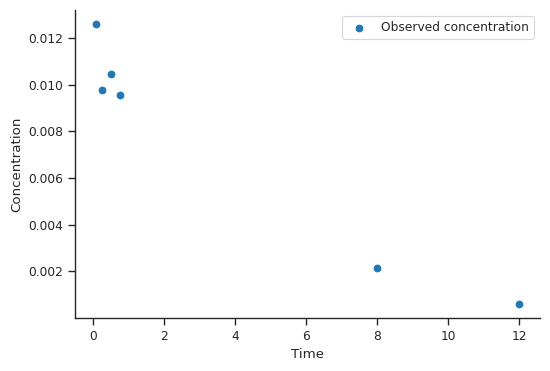

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(times, concentrations, label='Observed concentration', color='tab:blue')
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
ax.legend()
sns.despine()

## Part A - Implement the (unnormalized) log posterior density

Let $\theta=(k_{12}, k_{21}, k_d, V) \in \mathbb{R}_+^4$ be the PK parameters, to which we'll assign weakly-informative priors

$$
\begin{align*}
k_{12} &\sim \text{Exp}(0.1)\\
k_{21} &\sim \text{Exp}(0.1)\\
k_d &\sim \text{Exp}(0.1)\\
V &\sim \text{LogNormal}(4, 0.5).
\end{align*}
$$

Also, let $c_1(t; \theta, m_\text{dose}) \in \mathbb{R}_+^3$ be the concentration in the central (bloodstream) compartment at time $t$ for initial condition $x_0=(m_\text{dose}, 0) \in \mathbb{R}_+^2$.

Assume the observations are independent, identically distributed Gaussian random variables, i.e.,

$$
y_i|t_i, \theta, \sigma \sim \text{Normal}\Big(\underbrace{c_1(t_i; \theta, x_0)}_\text{ODE solver output}, \sigma^2 I\Big).
$$

Suppose you know, from previous studies, that the measurement uncertainty is $\sigma=0.001$.
The (unnormalized) log posterior density function is

$$
\begin{align*}
    \underbrace{\log p(\theta|\mathbf{t}, \mathbf{y}, \sigma)}_\text{posterior}
    &= \underbrace{\log p(\theta)}_\text{prior} + \underbrace{\log \prod_{i=1}^N p(y_i | t_i, \theta, \sigma)}_\text{likelihood} + \underbrace{[\text{constant terms w.r.t. } \theta]}_\text{normalizing contant (we can ignore)} \\
    &\propto \log p(k_{12}) + \log p(k_{21}) + \log p(k_d) +\log p(V) + \sum_{i=1}^N \log p(y_i | t_i, \theta, \sigma).
\end{align*}
$$

where we are defining $\propto$ to mean "equal up to a normalizing constant".
Now, it is easier to work with a set of "unconstrained model parameters" $\xi$ that span all of $\mathbb{R}^d$.
To this end, define

$$
\xi = \log \theta = (\log k_{12}, \log k_{21}, \log k_d, \log V) \in \mathbb{R}^4.
$$

**Your task is to implement the function that computes the (unnormalized) log posterior over $\xi$**

$$
\begin{align*}
    \log p(\xi | \mathbf{t}, \mathbf{y}, \sigma)
    &= \log p(\theta | \mathbf{t}, \mathbf{y}, \sigma) + \log \det \left| \frac{\partial \theta}{\partial \xi} \right|\\
    &= \log p(\theta | \mathbf{t}, \mathbf{y}, \sigma) + \log \prod_{i=1}^d \frac{\partial \theta_i}{\partial \xi_i} \\
    &= \log p(\xi) + \log p(\mathbf{y} | \mathbf{t}, \xi, \sigma) + \sum_{i=1}^d \xi_i + \underbrace{\text{constant terms}}_\text{ignore these}.
\end{align*}
$$

We've started it for you&mdash;just fill in the missing pieces of the code below:

In [12]:
sigma = 0.001

def constrain(params):
    """Constrain the parameters to be positive."""
    return {
        'k12': jnp.exp(params['k12']),
        'k21': jnp.exp(params['k21']),
        'kd': jnp.exp(params['kd']),
        'V': jnp.exp(params['V']),
    }

def unconstrain(params):
    """Unconstrain the parameters to be real numbers."""
    return {
        'k12': jnp.log(params['k12']),
        'k21': jnp.log(params['k21']),
        'kd': jnp.log(params['kd']),
        'V': jnp.log(params['V']),
    }

@jit
def log_posterior(xi, times=times, concentrations=concentrations, dosage_mass=dosage_mass, sigma=sigma):
    """Log likelihood function for a single individual's PK data.

    Parameters
    ----------
    xi: dict
        Dictionary containing the unconstrained parameters of the model:
        - k12: transfer rate from compartment 1 to compartment 2
        - k21: transfer rate from compartment 2 to compartment 1
        - kd: elimination rate from compartment 2
        - V: volume of distribution
    times: array
        Time points at which to evaluate the solution.
    concentrations: array
        Observed concentrations at the specified time points.
    dosage_mass: float
        Mass of the dosage administered.
    sigma: float
        Standard deviation of the measurement noise.

    Returns
    -------
    float
        Log likelihood of the observed data given the model parameters.
    """
    # Log PDF functions for standard distributions
    normal_log_pdf = lambda x, mu, sigma: (-0.5*jnp.log(2*jnp.pi)
                                          - jnp.log(sigma)
                                          - 0.5*((x - mu)/sigma)**2)

    lognormal_log_pdf = lambda x, mu, sigma: (-0.5*jnp.log(2*jnp.pi)
                                              - jnp.log(sigma) - jnp.log(x)
                                              - 0.5*((jnp.log(x) - mu)/sigma)**2)

    exponential_log_pdf = lambda x, rate: (jnp.log(rate) - rate*x)

    # Transform to constrained space
    params = constrain(xi)

    # Prior
    k12_log_prior = exponential_log_pdf(params['k12'], 0.1)
    k21_log_prior = exponential_log_pdf(params['k21'], 0.1)   # Your code here
    kd_log_prior = exponential_log_pdf(params['kd'], 0.1)  # Your code here
    V_log_prior = lognormal_log_pdf(params['V'], mu=4.0, sigma=0.5)  # Your code here
    log_prior = k12_log_prior + k21_log_prior + kd_log_prior + V_log_prior

    # Likelihood
    c1 = solve_pk_iv_bolus(params, times, dosage_mass)
    log_likelihood = log_likelihood = jnp.sum(normal_log_pdf(concentrations, c1, sigma))  # Your code here

    # Determinant of the Jacobian of the transformation
    log_det_jac = jnp.sum(xi['k12'] + xi['k21'] + xi['kd'] + xi['V'])

    return log_prior + log_likelihood + log_det_jac

Your implementation of $p(\xi|\mathbf{t}, \mathbf{y}, \sigma)$ above could also be done with a probabilistic programming framework.
Here is how to do it with [Numpyro](https://num.pyro.ai/en/latest/index.html#):

In [13]:
import jax.random as jr
import numpyro
import numpyro.distributions as dist
from numpyro.infer import util

def numpyro_model(times, concentrations, dosage_mass, sigma):
    """Model function for the JAX-based probabilistic model.

    Parameters
    ----------
    times: array
        Time points at which to evaluate the solution.
    concentrations: array
        Observed concentrations at the specified time points.
    dosage_mass: float
        Mass of the dosage administered.
    sigma: float
        Standard deviation of the measurement noise.

    Returns
    -------
    float
        Log likelihood of the observed data given the model parameters.
    """
    # Prior
    k12 = numpyro.sample('k12', dist.Exponential(0.1))
    k21 = numpyro.sample('k21', dist.Exponential(0.1))
    kd = numpyro.sample('kd', dist.Exponential(0.1))
    V = numpyro.sample('V', dist.LogNormal(4, 0.5))

    # Likelihood
    params = {'k12': k12, 'k21': k21, 'kd': kd, 'V': V}
    c1 = solve_pk_iv_bolus(params, times, dosage_mass)
    with numpyro.plate('data', len(times)):
        numpyro.sample('obs', dist.Normal(c1, sigma), obs=concentrations)

model_default_args = (times, concentrations, dosage_mass, sigma)

(
    init_params,
    potential_fn_gen,
    postprocess_fn_gen,
    model_trace
) = util.initialize_model(
    jr.key(0),
    numpyro_model,
    model_args=model_default_args,  # Dummy arguments
    dynamic_args=True,
)

# Get the probability density.
# This is p(ξ|y)
log_posterior_numpyro = lambda x: -potential_fn_gen(*model_default_args)(x)

# Get the transformation function.
# This is ξ ↦ θ
constrain_numpyro = jit(lambda x: util.constrain_fn(numpyro_model, model_default_args, {}, x))

# And get the inverse transformation function.
# This is θ ↦ ξ
unconstrain_numpyro = jit(lambda x: util.unconstrain_fn(numpyro_model, model_default_args, {}, x))

Run the cell below to test your implementation of $p(\xi|\mathbf{t}, \mathbf{y}, \sigma)$ against the Numpyro implementation. The printed results should be identical.

In [14]:
xi = {
    'k12': 0.1,
    'k21': 0.2,
    'kd': 0.3,
    'V': 10.0,
}

print('Log posterior evaluated from scratch: ', log_posterior(xi))
print('Log posterior evaluated from numpyro: ', log_posterior_numpyro(xi))

Log posterior evaluated from scratch:  -272.12405
Log posterior evaluated from numpyro:  -272.12408


## Part B - Plot the prior predictive distribution

First, let's create a function that samples the random variable $\xi$ (i.e., the prior over the unnormalized variables).

Again, complete the missing pieces of the following code:

In [15]:
@partial(jit, static_argnums=1)
def sample_prior_xi(key, num_samples):
    keys = jr.split(key, 4)
    k12 = (1/0.1)*jr.exponential(keys[0], shape=(num_samples,))
    k21 = (1/0.1)*jr.exponential(keys[1], shape=(num_samples,))  # Your code here
    kd = (1/0.1)*jr.exponential(keys[2], shape=(num_samples,))  # Your code here
    V = jnp.exp(4)*jr.lognormal(keys[3], shape=(num_samples,), sigma=0.5)
    xi = {
        'k12': jnp.log(k12),
        'k21':jnp.log(k21), # Your code here
        'kd':  jnp.log(kd),  # Your code here
        'V': jnp.log(V),
    }
    return xi

And again, we could implement the same thing using Numpyro.
Here is how you could use Numpyro's `Predictive` class to create a function that samples all latent variables defined in `numpyro_model`:

In [16]:
@partial(jit, static_argnums=1)
def sample_prior_xi_numpyro(key, num_samples):
    s = numpyro.infer.Predictive(numpyro_model, num_samples=num_samples)(key, *model_default_args)
    xi = vmap(unconstrain_numpyro)(s)
    xi = {k: v for k, v in xi.items() if k in init_params.z.keys()}
    return xi

Run the following cell to test your prior sampler against Numpyro's prior sampler.
The two should be essentially equivalent.

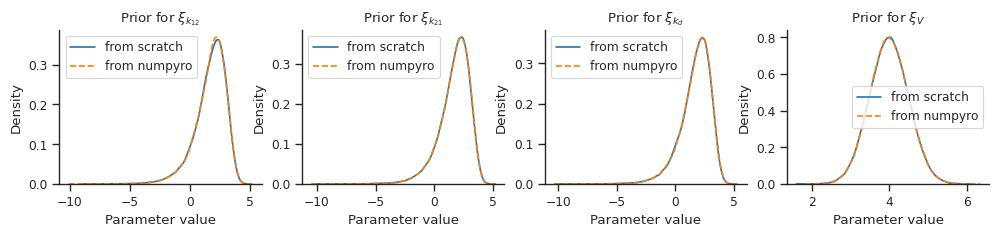

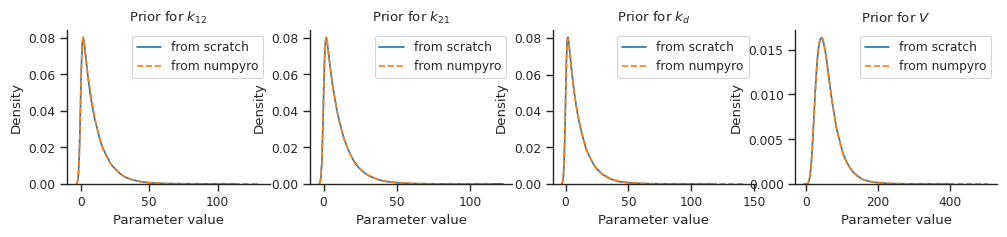

In [17]:
xi_prior_samples = sample_prior_xi(jr.key(0), 100_000)
xi_prior_samples_numpyro = sample_prior_xi_numpyro(jr.key(0), 100_000)
param_prior_samples = vmap(constrain)(xi_prior_samples)
param_prior_samples_numpyro = vmap(constrain_numpyro)(xi_prior_samples_numpyro)

fig, axes = plt.subplots(1, 4, figsize=(12, 2))

ax = axes[0]
sns.kdeplot(xi_prior_samples['k12'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(xi_prior_samples_numpyro['k12'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $\xi_{k_{12}}$')
ax.legend()

ax = axes[1]
sns.kdeplot(xi_prior_samples['k21'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(xi_prior_samples_numpyro['k21'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $\xi_{k_{21}}$')
ax.legend()

ax = axes[2]
sns.kdeplot(xi_prior_samples['kd'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(xi_prior_samples_numpyro['kd'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $\xi_{k_{d}}$')
ax.legend()

ax = axes[3]
sns.kdeplot(xi_prior_samples['V'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(xi_prior_samples_numpyro['V'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $\xi_{V}$')
ax.legend()

sns.despine()

fig, axes = plt.subplots(1, 4, figsize=(12, 2))

ax = axes[0]
sns.kdeplot(param_prior_samples['k12'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(param_prior_samples_numpyro['k12'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $k_{12}$')
ax.legend()

ax = axes[1]
sns.kdeplot(param_prior_samples['k21'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(param_prior_samples_numpyro['k21'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $k_{21}$')
ax.legend()

ax = axes[2]
sns.kdeplot(param_prior_samples['kd'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(param_prior_samples_numpyro['kd'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $k_{d}$')
ax.legend()

ax = axes[3]
sns.kdeplot(param_prior_samples['V'], label='from scratch', color='tab:blue', ax=ax)
sns.kdeplot(param_prior_samples_numpyro['V'], label='from numpyro', color='tab:orange', linestyle='--', ax=ax)
ax.set_xlabel('Parameter value')
ax.set_title(r'Prior for $V$')
ax.legend()

sns.despine()

(From this point forward, feel free to use either your implementation of the log density and prior sampler or the Numpyro implementation.)

Now, collect 1000 *prior* samples of $\theta=e^\xi$.
Plot the the following over the time interval $[0, 12]$ hours:
- The 95% credible interval for $c_1(t; \theta, m_\text{dose})$
- The 95% predictive interval for $c_1(t; \theta, m_\text{dose}) + \epsilon; ~ \epsilon \sim \mathcal{N}(0, \sigma)$
- A few samples of $c_1(t; \theta, m_\text{dose})$

Hint: You may simply run the following code cell to create the plots.

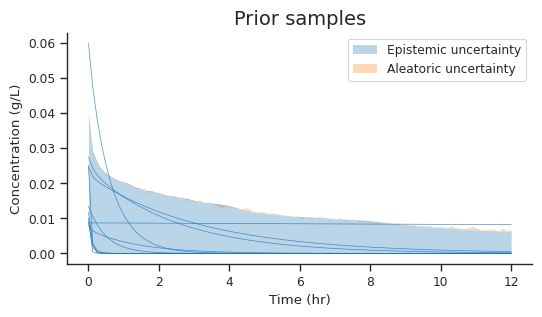

In [18]:
key, subkey = jr.split(jr.key(1))

t_plt = jnp.linspace(0, 12, 100)
xi_prior_samples = sample_prior_xi(jr.key(0), 1_000)
theta_prior_samples = vmap(constrain)(xi_prior_samples)
c1_prior_samples = vmap(solve_pk_iv_bolus, (0, None, None))(theta_prior_samples, t_plt, 1.0)
y_prior_predictive_samples = c1_prior_samples + sigma*jr.normal(key, shape=c1_prior_samples.shape)

q05_epistemic, q95_epistemic = jnp.quantile(c1_prior_samples, jnp.array([0.05, 0.95]), axis=0)
q05_aleatoric, q95_aleatoric = jnp.quantile(y_prior_predictive_samples, jnp.array([0.05, 0.95]), axis=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(t_plt, c1_prior_samples[:10].T, color='tab:blue', lw=0.5, alpha=0.8)
ax.fill_between(t_plt, q95_aleatoric, q95_epistemic, color='tab:orange', alpha=0.3, lw=0)
ax.fill_between(t_plt, q95_epistemic, q05_epistemic, color='tab:blue', alpha=0.3, lw=0, label='Epistemic uncertainty')
ax.fill_between(t_plt, q05_epistemic, q05_epistemic, color='tab:orange', alpha=0.3, lw=0, label='Aleatoric uncertainty')
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Concentration (g/L)')
ax.set_title('Prior samples', fontsize=14)
ax.legend()
sns.despine()

## Part C - Find the maximum a-posteriori estimate

Now, we want to find the maximum a-posteriori (MAP) estimate $\xi^*$, i.e.,

$$
\xi^* = \arg \max_\xi p(\xi|\mathbf{t}, \mathbf{y} , \sigma).
$$

We now have an unconstrained optimization problem.

**Do the following:**
- Use ADAM to find $\xi^*$. Show that the loss converges. You may want to run ADAM for a few different starting points to ensure you have found the global maximum.
- Report the MAP estimate of the parameters *in constrained space*, i.e., $\theta^*=e^{\xi^*}$.
- Plot the MAP estimate for the central compartment concentration $c_1(t; \theta^*, m_\text{dose})$ *and* the 95% predictive interval (aleatoric uncertainty). (Hint: See part B.)
Overlay the observations on the plot.
- Compute and report the *area under the curve* (AUC) of the $c_1$-$t$ curve from $t=0$ to $t=36$ hours, i.e.,

$$
\int_0^{36} c_1(t; \theta^*, m_\text{dose}) dt.
$$

&emsp;&emsp;&ensp;(AUC is a measure of the *total drug exposure*, and it helps assess drug efficacy and safety.)

**Your answer here:** <br><br><br><br><br>

--------------------


100%|██████████| 2000/2000 [00:00<00:00, 2468.73it/s]



 --------------------
MAP estimate (constrained θ): {'k12': Array(4.2891364, dtype=float32), 'k21': Array(11.266081, dtype=float32), 'kd': Array(0.86341345, dtype=float32), 'V': Array(42.920307, dtype=float32)}

--------------------


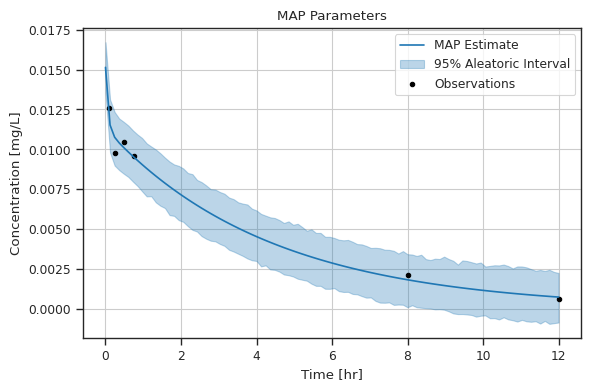


--------------------
AUC (0–36 hr) [JAX]: 0.0465 mg·hr/L


In [19]:
import optax
from jax import value_and_grad
from tqdm import trange

# # Initial guess
xi_init = {
    'k12': jnp.log(0.4),
    'k21': jnp.log(0.5),
    'kd': jnp.log(0.9),
    'V': jnp.log(50.0),
}

# Convert dict to flat vector (for optimization)
def flatten_dict(d):
    return jnp.concatenate([d[k][None] for k in ['k12', 'k21', 'kd', 'V']])

def unflatten_vec(vec):
    return {'k12': vec[0], 'k21': vec[1], 'kd': vec[2], 'V': vec[3]}

xi_vec = flatten_dict(xi_init)

# Define optimizer
optimizer = optax.adam(learning_rate=1e-2)
opt_state = optimizer.init(xi_vec)

@jit
def step(xi_vec, opt_state):
    xi_dict = unflatten_vec(xi_vec)
    loss, grads = value_and_grad(lambda x: -log_posterior(unflatten_vec(x)))(xi_vec)
    updates, opt_state = optimizer.update(grads, opt_state)
    xi_vec = optax.apply_updates(xi_vec, updates)
    return xi_vec, opt_state, loss

# Run optimization
n_steps = 2000
losses = []

print("--------------------")
for i in trange(n_steps):
    xi_vec, opt_state, loss = step(xi_vec, opt_state)
    losses.append(loss)

xi_map = unflatten_vec(xi_vec)
theta_map = constrain(xi_map)

print("\n --------------------")
print("MAP estimate (constrained θ):", theta_map)
# print("MAP estimate (unconstrained θ):", unconstrain(theta_map))

print("\n--------------------")
import matplotlib.pyplot as plt

t_plt = jnp.linspace(0, 12, 100)
c1_map = solve_pk_iv_bolus(theta_map, t_plt, dosage_mass)

# Aleatoric noise
key = jr.key(42)
y_samples = c1_map[:, None] + sigma * jr.normal(key, (len(t_plt), 1000))
y_q05, y_q95 = jnp.quantile(y_samples, jnp.array([0.05, 0.95]), axis=1)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(t_plt, c1_map, label='MAP Estimate', color='tab:blue')
plt.fill_between(t_plt, y_q05, y_q95, color='tab:blue', alpha=0.3, label='95% Aleatoric Interval')
plt.scatter(times, concentrations, color='black', s=10, label='Observations')
plt.xlabel('Time [hr]')
plt.ylabel('Concentration [mg/L]')
plt.title('MAP Parameters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--------------------")
# Calculate the AUC
auc_jax = 0.5 * jnp.sum((c1_map[1:] + c1_map[:-1]) * (t_plt[1:] - t_plt[:-1]))
print(f"AUC (0–36 hr) [JAX]: {auc_jax:.4f} mg·hr/L")

## Part D - Sample the posterior with MCMC

Instead of only finding a point estimate of the parameters (as in Part C), we will characterize the full posterior distribution $p(\xi|\mathbf{t}, \mathbf{y}, \sigma)$.
This will allow us to quantify our *epistemic* or *lack-of-data* uncertainty about the parameters.

**Do the following:**
- Sample the from posterior distribution $p(\xi|\mathbf{t}, \mathbf{y}, \sigma)$ using the No-U-Turn Sampler (NUTS). Use at least 3 chains and 1000 samples per chain. (Hint: See [this hands-on activity demonstrating NUTS in blackjax](https://predictivesciencelab.github.io/advanced-scientific-machine-learning/inverse/sampling/04_nuts_blackjax.html).)
- Show the trace plots of the MCMC chains. Report MCMC diagnostics (R-hat, ESS). Argue whether the chains have converged. (Hint: Use `arviz.plot_trace` and `arviz.summary`.)
- Plot all the $\xi$ samples onto a scatterplot matrix. (Hint: Use `seaborn.pairplot`.)
Comment on how identifiable the parameters are.
- Compute the concentration $c_1$ for each posterior sample, over the time interval $[0, 12]$.
Plot the 95% credible interval, 95% predictive interval, and a few samples from the posterior. (Hint: See Part B.)
- Plot a histogram of the area under the curve (AUC) for the posterior samples (see part C for the definition of "AUC").

**Your answer here:** <br><br><br><br><br>

Using example from https://predictivesciencelab.github.io/advanced-scientific-machine-learning/inverse/sampling/04_nuts_blackjax.html

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
samples[0],0.439,1.072,-1.450,2.297,0.056,0.029,366.0,251.0,1.01
samples[1],2.283,0.962,0.593,3.963,0.033,0.035,997.0,904.0,1.00
samples[2],1.114,1.136,-0.886,3.099,0.052,0.024,436.0,398.0,1.01
samples[3],3.889,0.147,3.582,4.097,0.008,0.007,431.0,251.0,1.01


---


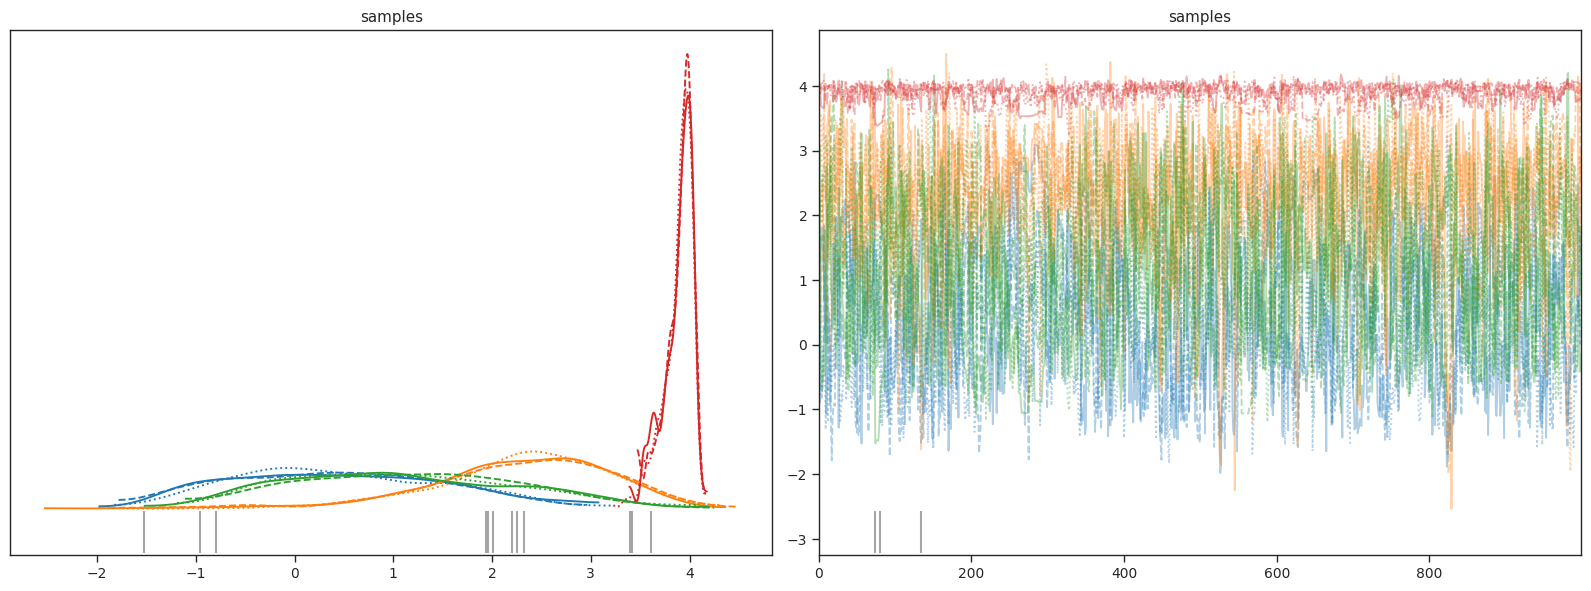

In [20]:
# Sample the from posterior distribution  p(ξ|t,y,σ)  using the No-U-Turn Sampler (NUTS). Use at least 3 chains and 1000 samples per chain. (Hint: See this hands-on activity demonstrating NUTS in blackjax.)
# Show the trace plots of the MCMC chains. Report MCMC diagnostics (R-hat, ESS).
def run_inference(
    joint_log_prob: Callable,
    sample_starting_point: Callable,
    key: PRNGKeyArray,
    num_warmup: int,
    num_samples: int,
    num_chains: int
):
    """Do warmup with window adaptation (to tune step size and mass matrix) and then sample using NUTS.
    Returns a tuple with the NUTS states and some info.
    """
    # Initialize the window adaptation algorithm
    warmup = blackjax.window_adaptation(blackjax.nuts, joint_log_prob)

    # Initialize the MCMC chain
    key, init_key, warmup_key, sample_key = jax.random.split(key, 4)
    init_position = sample_starting_point(init_key, num_chains)



    # Run the warmup phase for each chain
    @jax.vmap
    def call_warmup(seed, param):
        """Run the warmup phase for a single chain."""
        (initial_states, tuned_params), _ = warmup.run(seed, param, num_warmup)
        return initial_states, tuned_params
    warmup_keys = jax.random.split(warmup_key, num_chains)
    initial_states, tuned_params = jax.jit(call_warmup)(warmup_keys, init_position)

    # Run the sampling phase
    states, infos = inference_loop_multiple_chains(sample_key, initial_states, tuned_params, joint_log_prob, num_samples, num_chains)

    # `states` contains the samples, `infos` contains other information about the sampling process
    return states, infos


def sample_starting_point(
    key: PRNGKeyArray,
    num_chains: int,
    mu: Array,
    Sigma: Array
):
    """Draw samples from a multivariate normal as starting points for the MCMC chains.
    Returns an array of shape (num_chains, num_dims).
    """
    keys = jrandom.split(key, num_chains)
    return vmap(lambda k: jrandom.multivariate_normal(k, mu, Sigma))(keys)


def inference_loop_multiple_chains(
    key: PRNGKeyArray,
    initial_states: PyTree,
    tuned_params: dict,
    log_prob_fn: Callable,
    num_samples: int,
    num_chains: int
):
    """Do NUTS sampling for multiple chains in a vectorized fashion. Returns a tuple with the NUTS states and some info."""
    # Initialize the NUTS kernel
    kernel = blackjax.nuts.build_kernel()

    def step_fn(key, state, **params):
        """A single step of NUTS for one chain."""
        return kernel(key, state, log_prob_fn, **params)

    def one_step(states, key):
        """A single step of NUTS for multiple chains."""
        keys = jax.random.split(key, num_chains)
        states, infos = jax.vmap(step_fn)(keys, states, **tuned_params)
        return states, (states, infos)

    # Run the NUTS sampling for multiple chains
    keys = jax.random.split(key, num_samples)
    _, (states, infos) = jax.lax.scan(one_step, initial_states, keys)

    return (states, infos)
import blackjax
import jax.random as jr

key = jr.key(123)
num_chains = 3
num_warmup = 500
num_samples = 1000

# Starting points
mu = flatten_dict(xi_map)
Sigma = 0.1 * jnp.eye(len(mu))

sample_start = lambda key, n: sample_starting_point(key, n, mu=mu, Sigma=Sigma)

states, infos = run_inference(
    joint_log_prob=lambda x: log_posterior(unflatten_vec(x)),
    sample_starting_point=sample_start,
    key=key,
    num_warmup=num_warmup,
    num_samples=num_samples,
    num_chains=num_chains
)

def arviz_trace_from_states(states, info, burn_in=0):
    position = states.position
    if isinstance(position, jax.Array):
        position = dict(samples=position)
    else:
        try:
            position = position._asdict()
        except AttributeError:
            pass

    samples = {}
    for param in position.keys():
        ndims = len(position[param].shape)
        if ndims >= 2:
            samples[param] = jnp.swapaxes(position[param], 0, 1)[
                :, burn_in:
            ]
            divergence = jnp.swapaxes(info.is_divergent[burn_in:], 0, 1)

        if ndims == 1:
            divergence = info.is_divergent
            samples[param] = position[param]

    trace_posterior = az.convert_to_inference_data(samples)
    trace_sample_stats = az.convert_to_inference_data(
        {"diverging": divergence}, group="sample_stats"
    )
    trace = az.concat(trace_posterior, trace_sample_stats)
    return trace

trace = arviz_trace_from_states(states, infos)
summ_df = az.summary(trace)

import IPython.display as dp
dp.display(summ_df)
print("---")
az.plot_trace(trace, figsize=(16, 6))
plt.tight_layout()
plt.show()

To check if chains have converged.

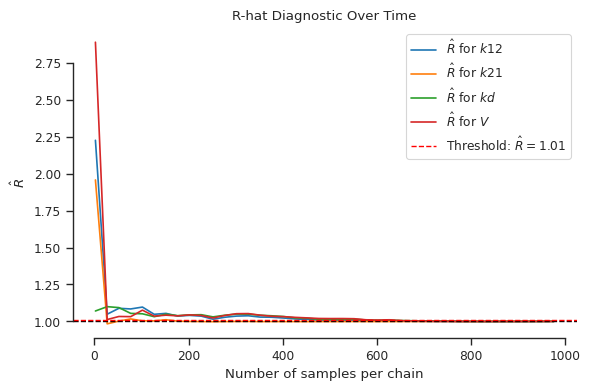

In [21]:
# Argue whether the chains have converged. (Hint: Use arviz.plot_trace and arviz.summary.)

# Transpose to shape (num_chains, num_samples, num_params)
samples = states.position.transpose(1, 0, 2)

# Compute R-hat every few steps
compute_diagnostics_every = 25
num_samples_per_chain = samples.shape[1]
param_names = ["k12", "k21", "kd", "V"]

rhats = []
for i in range(2, num_samples_per_chain, compute_diagnostics_every):
    rhat = blackjax.diagnostics.potential_scale_reduction(samples[:, :i, :])
    rhats.append(rhat)
rhats = jnp.array(rhats)
sample_counts = range(2, num_samples_per_chain, compute_diagnostics_every)

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
for i, name in enumerate(param_names):
    ax.plot(sample_counts, rhats[:, i], label=fr"$\hat{{R}}$ for ${name}$")

ax.axhline(1.0, color="black", linestyle="--", lw=1)
ax.axhline(1.01, color="red", linestyle="--", lw=1, label=r"Threshold: $\hat{R} = 1.01$")
ax.set_xlabel("Number of samples per chain")
ax.set_ylabel(r"$\hat{R}$")
ax.set_title("R-hat Diagnostic Over Time")
ax.legend()
sns.despine(trim=True)
plt.tight_layout()
plt.show()

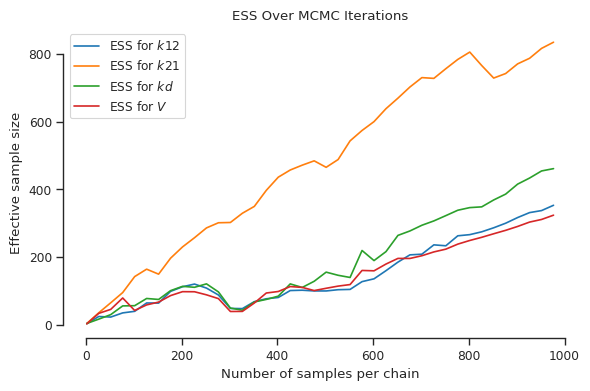

In [22]:
# Compute progressive ESS over time
n_effs = []
for i in range(2, num_samples_per_chain, compute_diagnostics_every):
    ess = blackjax.diagnostics.effective_sample_size(samples[:, :i, :])
    n_effs.append(ess)
n_effs = jnp.array(n_effs)

# Plot
param_names = ["k12", "k21", "kd", "V"]
sample_counts = range(2, num_samples_per_chain, compute_diagnostics_every)

fig, ax = plt.subplots(figsize=(6, 4))
for i, name in enumerate(param_names):
    ax.plot(sample_counts, n_effs[:, i], label=fr"ESS for ${name}$")

ax.set_xlabel("Number of samples per chain")
ax.set_ylabel("Effective sample size")
ax.set_title("ESS Over MCMC Iterations")
ax.legend()
sns.despine(trim=True)
plt.tight_layout()
plt.show()


Several indication of good convergence
Numerically,
1. r_hat	~ 1.00 implies Chain agreement (convergence)


2. ESS_bulk is high implies effective independent samples and not correlated.


Plot all the  ξ  samples onto a scatterplot matrix. (Hint: Use seaborn.pairplot.) Comment on how identifiable the parameters are.

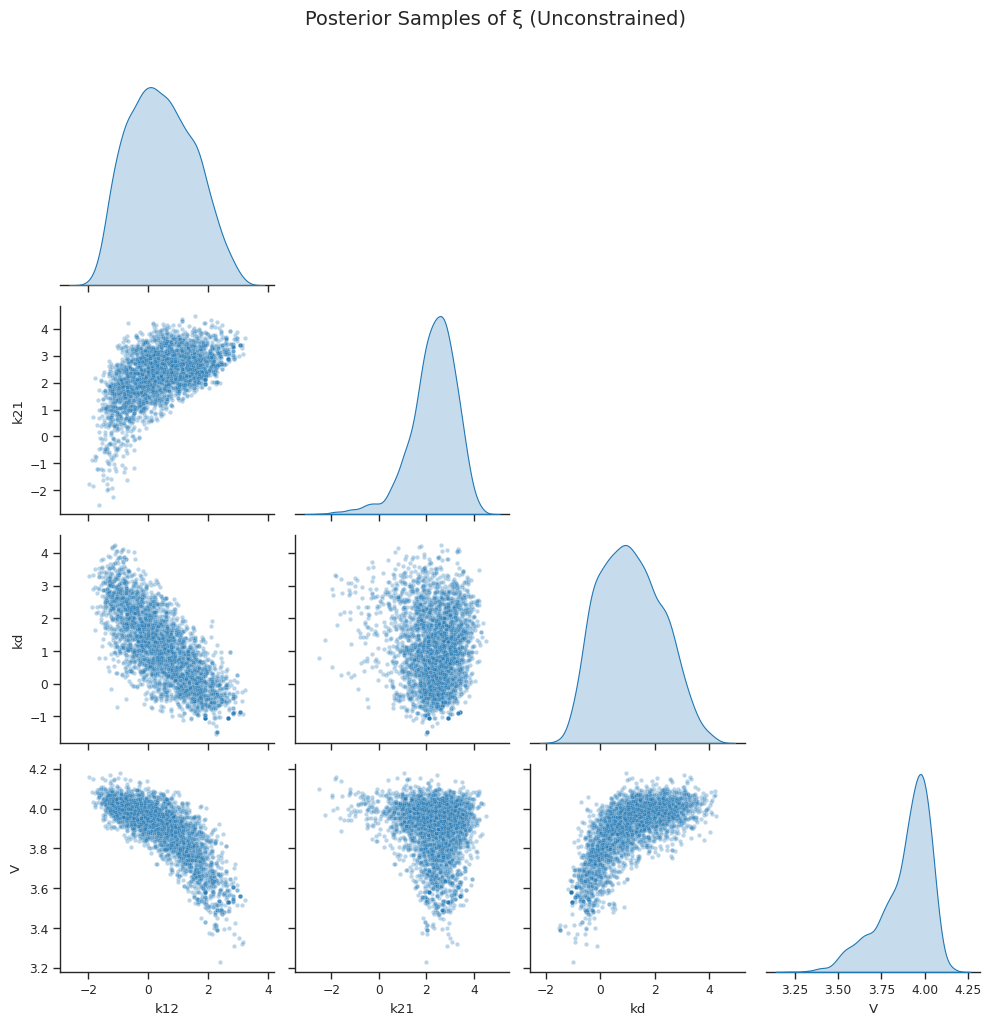

In [23]:
# Plot all the  ξ  samples onto a scatterplot matrix. (Hint: Use seaborn.pairplot.) Comment on how identifiable the parameters are.
idata = arviz_trace_from_states(states, infos)


samples = states.position

if samples.shape[0] < samples.shape[1]:
    samples = samples.transpose(1, 0, 2)

num_chains, num_samples_per_chain, num_params = samples.shape
flat_samples = samples.reshape(-1, num_params)
param_names = ["k12", "k21", "kd", "V"]
df = pd.DataFrame(flat_samples, columns=param_names)

# Pairplot
sns.pairplot(df, corner=True, diag_kind='kde', plot_kws={'alpha': 0.3, 's': 10})
plt.suptitle("Posterior Samples of ξ (Unconstrained)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

Some comments:

$V$ is well-defined and identifiable

$k_{12}$ and $k_{21}$ are not identifiable independently

$k_d$ is moderately constrained, but shows nonlinear correlation with others

Compute the concentration  c1  for each posterior sample, over the time interval  [0,12] . Plot the 95% credible interval, 95% predictive interval, and a few samples from the posterior. (Hint: See Part B.)

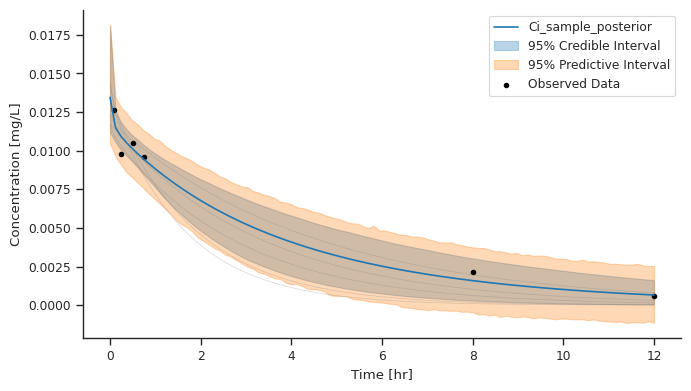

In [24]:
# Compute the concentration  c1  for each posterior sample, over the time interval  [0,12] .
# Plot the 95% credible interval, 95% predictive interval, and a few samples from the posterior. (Hint: See Part B.)

t_plt = jnp.linspace(0, 12, 100)

samples = states.position
if samples.shape[0] < samples.shape[1]:
    samples = samples.transpose(1, 0, 2)

flat_samples = samples.reshape(-1, samples.shape[-1])


param_names = ["k12", "k21", "kd", "V"]
posterior_xi = {name: flat_samples[:, i] for i, name in enumerate(param_names)}


theta_samples = vmap(constrain)(posterior_xi)


c1_samples = vmap(solve_pk_iv_bolus, (0, None, None))(theta_samples, t_plt, dosage_mass)


key = jr.key(123)
noise = sigma * jr.normal(key, shape=c1_samples.shape)
y_pred = c1_samples + noise


c1_q05, c1_q95 = jnp.quantile(c1_samples, jnp.array([0.05, 0.95]), axis=0)
y_q05, y_q95 = jnp.quantile(y_pred, jnp.array([0.05, 0.95]), axis=0)

# Plot
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(t_plt, jnp.mean(c1_samples, axis=0), label='Ci_sample_posterior', color='tab:blue')
ax.plot(t_plt, c1_samples[:5].T, color='tab:gray', lw=0.5, alpha=0.3)

ax.fill_between(t_plt, c1_q05, c1_q95, color='tab:blue', alpha=0.3, label='95% Credible Interval')
ax.fill_between(t_plt, y_q05, y_q95, color='tab:orange', alpha=0.3, label='95% Predictive Interval')

ax.scatter(times, concentrations, color='black', s=10, label='Observed Data')

ax.set_xlabel("Time [hr]")
ax.set_ylabel("Concentration [mg/L]")
ax.legend()
sns.despine()
plt.tight_layout()
plt.show()


Plot a histogram of the area under the curve (AUC) for the posterior samples (see part C for the definition of "AUC").

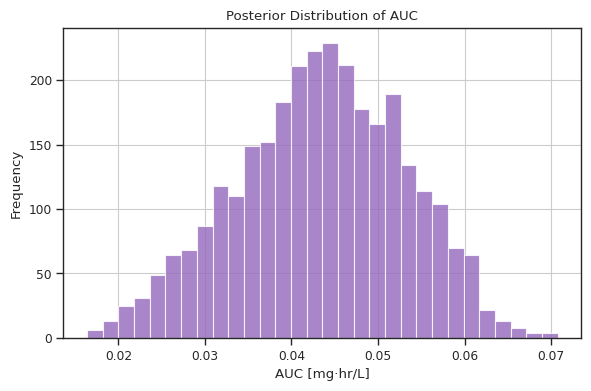

In [25]:
# Compute AUC for each sample using the trapezoidal rule
S = 0.5 * jnp.sum((c1_samples[:, 1:] + c1_samples[:, :-1]) * (t_plt[1:] - t_plt[:-1]), axis=1)

plt.figure(figsize=(6, 4))
plt.hist(S, bins=30, color='tab:purple', alpha=0.8)
plt.xlabel("AUC [mg·hr/L]")
plt.ylabel("Frequency")
plt.title("Posterior Distribution of AUC")
plt.grid(True)
plt.tight_layout()
plt.show()

## Part E - Variational inference with mean-field Gaussian guide

**Do the following:**
- Construct a mean-field multivariate Gaussian guide (i.e., diagonal covariance matrix)

$$
q_\phi(\xi)=\mathcal{N}(\xi| \mu_\phi, \sigma_\phi I).
$$

- Maximize the Evidence Lower Bound (ELBO) with respect to the guide parameters $\phi$ so that the guide approximates the posterior, i.e.

$$
q_\phi\approx p(\xi|\mathbf{t}, \mathbf{y}, \sigma).
$$
&emsp;&emsp;&ensp;(Hint: See [this hands-on activity implementing VI with a full-rank Gaussian guide](https://predictivesciencelab.github.io/advanced-scientific-machine-learning/inverse/vi/02_catalysis.html).
If you use `FullRankGaussianGuide` from the hands-on activity, at a minimum you will need to modify `Sigma`, `forward`, and `get_num_guide_params` to match the form of a mean-field Gaussian guide.
)

- Argue whether the optimization converged.
- Collect 5,000 (approximate) posterior samples of $\xi$ from the trained guide.
- Plot all the $\xi$ samples onto a scatterplot matrix.
Overlay the MCMC samples from part D.
Use transparency so that both VI and MCMC samples are visible.
How well does mean-field Gaussian VI approximate the posterior?
- As in parts B and D, compute the concentration $c_1$ for each posterior sample, over the time interval $[0, 12]$.
Plot the 95% credible interval, 95% predictive interval, and a few samples from the posterior.
- Plot a histogram of the AUCs of the posterior samples.
Overlay (with transparency) the AUC histogram from part D (MCMC).
Do they match?

**Your answer here:** <br><br><br><br><br>

reference - https://predictivesciencelab.github.io/advanced-scientific-machine-learning/inverse/vi/02_catalysis.html

In [27]:
# Construct a mean-field multivariate Gaussian guide (i.e., diagonal covariance matrix)
# Maximize the Evidence Lower Bound (ELBO) with respect to the guide parameters  ϕ
#  so that the guide approximates the posterior and argue about convergence too

# Define the mean‑field guide
class MeanFieldGaussianGuide(eqx.Module):
    guide_params: jnp.ndarray
    num_model_params: int = eqx.field(static=True)

    @property
    def mu(self):
        return self.guide_params[:self.num_model_params]

    @property
    def std(self):
        return jnp.exp(self.guide_params[self.num_model_params:])

    def forward(self, eps):
        # eps: (..., num_model_params)
        return self.mu + eps * self.std

    def logprob(self, x):
        # x: (..., num_model_params)
        return jnp.sum(jax.scipy.stats.norm.logpdf(
            x, loc=self.mu, scale=self.std), axis=-1)

    def sample(self, key, num_samples=1):
        """Sample from the guide distribution"""
        eps = jr.normal(key, shape=(num_samples, self.num_model_params))
        return self.forward(eps)

    def flatten(self):
        return self.guide_params

    @staticmethod
    def get_num_guide_params(num_model_params):
        return 2 * num_model_params

# Negative ELBO per sample
def minus_elbo_single(params, eps):
    """
    Given flattened guide params and one eps sample,
    compute -( log p(x|data) - log q(x) ).
    """
    q_tmp = MeanFieldGaussianGuide(params, num_model_params)
    x = q_tmp.forward(eps)
    # unpack x to dict for log_posterior
    xi = {'k12': x[0], 'k21': x[1], 'kd': x[2], 'V': x[3]}
    logp = log_posterior(xi)
    logq = q_tmp.logprob(x)
    return -(logp - logq)


# Vectorized batch loss
@jit
def batch_loss(params, eps_batch):
    # eps_batch: (batch_size, num_model_params)
    # compute neg_elbo_single on each row
    losses = jax.vmap(lambda e: minus_elbo_single(params, e))(eps_batch)
    return jnp.mean(losses)

# Initialize guide + optimizer
params = init_params
optimizer = optax.adam(1e-3)
opt_state = optimizer.init(params)

# One VI step
@jit
def step(params, opt_state, eps_batch):
    loss, grads = value_and_grad(batch_loss)(params, eps_batch)
    updates, opt_state = optimizer.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, opt_state, loss

# Set up everything
num_model_params = 4
map_mu = flatten_dict(xi_map)
map_std = jnp.sqrt(jnp.diag(jnp.eye(4)*0.1))
init_params = jnp.concatenate([map_mu, jnp.log(map_std)])



# VI hyper‑params
num_iter = 40_000
report_every = 500
batch_size =100
key = jr.PRNGKey(0)

neg_elbo_hist = []
grad_norms = []

# for i in range(num_iter):
#     key, subkey = jr.split(key)
#     eps_batch   = jr.normal(subkey, (batch_size, num_model_params))
#     params, opt_state, loss = step(params, opt_state, eps_batch)

#     # print every report_every iters
#     if (i + 1) % report_every == 0:
#         # loss is “negative ELBO” estimate
#         print(f"Iteration {(i+1):4d}/{num_iter:4d} \t ELBO: {loss:.2f}")


    # neg_elbo_hist.append(loss)

# Training loop
for i in range(num_iter):
    key, subkey = jax.random.split(key)
    eps_batch   = jax.random.normal(subkey, (batch_size, num_model_params))
    loss, grads = jax.value_and_grad(batch_loss)(params, eps_batch)

    # Compute the norm over all gradient
    leaves = jax.tree_util.tree_leaves(grads)
    # flatten each leaf and concatenate
    all_grads = jnp.concatenate([g.ravel() for g in leaves])
    grad_norm = jnp.linalg.norm(all_grads)

    # take an optimizer step
    updates, opt_state = optimizer.update(grads, opt_state, params)
    params = optax.apply_updates(params, updates)

    # logging
    neg_elbo_hist.append(loss)
    grad_norms.append(grad_norm)
    if (i + 1) % report_every == 0:
        print(f"Iteration {i+1:5d}/{num_iter:5d}  ELBO: {-loss:.2f}  ∥∇ELBO∥: {grad_norm:.2e}")

# Final guide
phi_opt = MeanFieldGaussianGuide(params, num_model_params)

Iteration   500/40000  ELBO: 17.62  ∥∇ELBO∥: 1.81e+01
Iteration  1000/40000  ELBO: 21.44  ∥∇ELBO∥: 2.29e+01
Iteration  1500/40000  ELBO: 23.74  ∥∇ELBO∥: 2.17e+01
Iteration  2000/40000  ELBO: 24.08  ∥∇ELBO∥: 9.77e+00
Iteration  2500/40000  ELBO: 25.00  ∥∇ELBO∥: 4.96e+00
Iteration  3000/40000  ELBO: 25.74  ∥∇ELBO∥: 4.67e+00
Iteration  3500/40000  ELBO: 26.11  ∥∇ELBO∥: 5.66e+00
Iteration  4000/40000  ELBO: 25.85  ∥∇ELBO∥: 1.29e+00
Iteration  4500/40000  ELBO: 25.94  ∥∇ELBO∥: 2.82e+00
Iteration  5000/40000  ELBO: 25.94  ∥∇ELBO∥: 7.20e+00
Iteration  5500/40000  ELBO: 26.01  ∥∇ELBO∥: 3.48e+00
Iteration  6000/40000  ELBO: 26.16  ∥∇ELBO∥: 7.00e+00
Iteration  6500/40000  ELBO: 26.34  ∥∇ELBO∥: 1.17e+00
Iteration  7000/40000  ELBO: 26.43  ∥∇ELBO∥: 5.12e+00
Iteration  7500/40000  ELBO: 26.42  ∥∇ELBO∥: 2.25e+00
Iteration  8000/40000  ELBO: 26.26  ∥∇ELBO∥: 7.89e-01
Iteration  8500/40000  ELBO: 26.56  ∥∇ELBO∥: 3.86e+00
Iteration  9000/40000  ELBO: 26.72  ∥∇ELBO∥: 1.23e+00
Iteration  9500/40000  ELBO:

Optimized Guide Parameters (mean ± std)
k12 :  -0.8166 ± 0.2424
k21 :   1.6219 ± 0.5572
kd  :   2.4589 ± 0.5224
V   :   3.9932 ± 0.0466
Convergence Analysis
Initial ELBO:  -1.1455
Final ELBO:  26.6873
Improvement :  27.8328
Change over last 100 iters: -0.014767
ELBO has effectively converged (change < 1e-2)


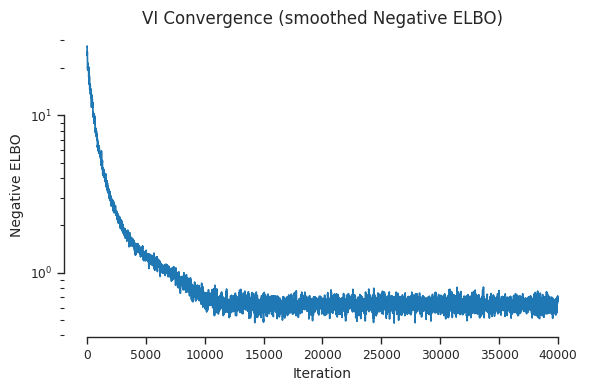

In [28]:
# Helper to go from a 4‑vector back to a dict of parameter names
def unflatten_params(vec):
    return {"k12": vec[0], "k21": vec[1], "kd": vec[2], "V": vec[3]}

neg_elbo_arr = jnp.array(neg_elbo_hist)

# Print out the final guide
print("Optimized Guide Parameters (mean ± std)")
opt_dict = unflatten_params(phi_opt.mu)
for i, name in enumerate(["k12","k21","kd","V"]):
  mean = float(phi_opt.mu[i])
  std  = float(phi_opt.std[i])
  print(f"{name:4s}: {mean:8.4f} ± {std:6.4f}")

# Compute ELBO from the negative‐ELBO history
initial_elbo = -neg_elbo_arr[0]
final_elbo   = -neg_elbo_arr[-1]
improvement  = final_elbo - initial_elbo

print("Convergence Analysis")
print(f"Initial ELBO: {initial_elbo:8.4f}")
print(f"Final ELBO: {final_elbo:8.4f}")
print(f"Improvement : {improvement:8.4f}")

# Has it plateaued?
window = min(100, len(neg_elbo_arr)//5)
if len(neg_elbo_arr) > 2*window:
  recent_change = jnp.mean(-neg_elbo_arr[-window:]) - jnp.mean(-neg_elbo_arr[-2*window:-window])
  print(f"Change over last {window} iters: {recent_change: .6f}")
  if jnp.abs(recent_change) < 1e-1:
      print("ELBO has effectively converged (change < 1e-2)")
  else:
      print("ELBO may still be drifting.")

# Plot the same smoothed trace
fig, ax = plt.subplots(figsize=(6,4))
w = 20
sm = np.convolve(
    neg_elbo_arr - float(neg_elbo_arr.min()),
    np.ones(w)/w, mode="valid"
)
ax.plot(sm)
ax.set_yscale("log")
ax.set_title("VI Convergence (smoothed Negative ELBO)", fontsize=12)
ax.set_xlabel("Iteration", fontsize=10)
ax.set_ylabel("Negative ELBO", fontsize=10)
import seaborn as sns; sns.despine(trim=True)
plt.tight_layout()
plt.show()

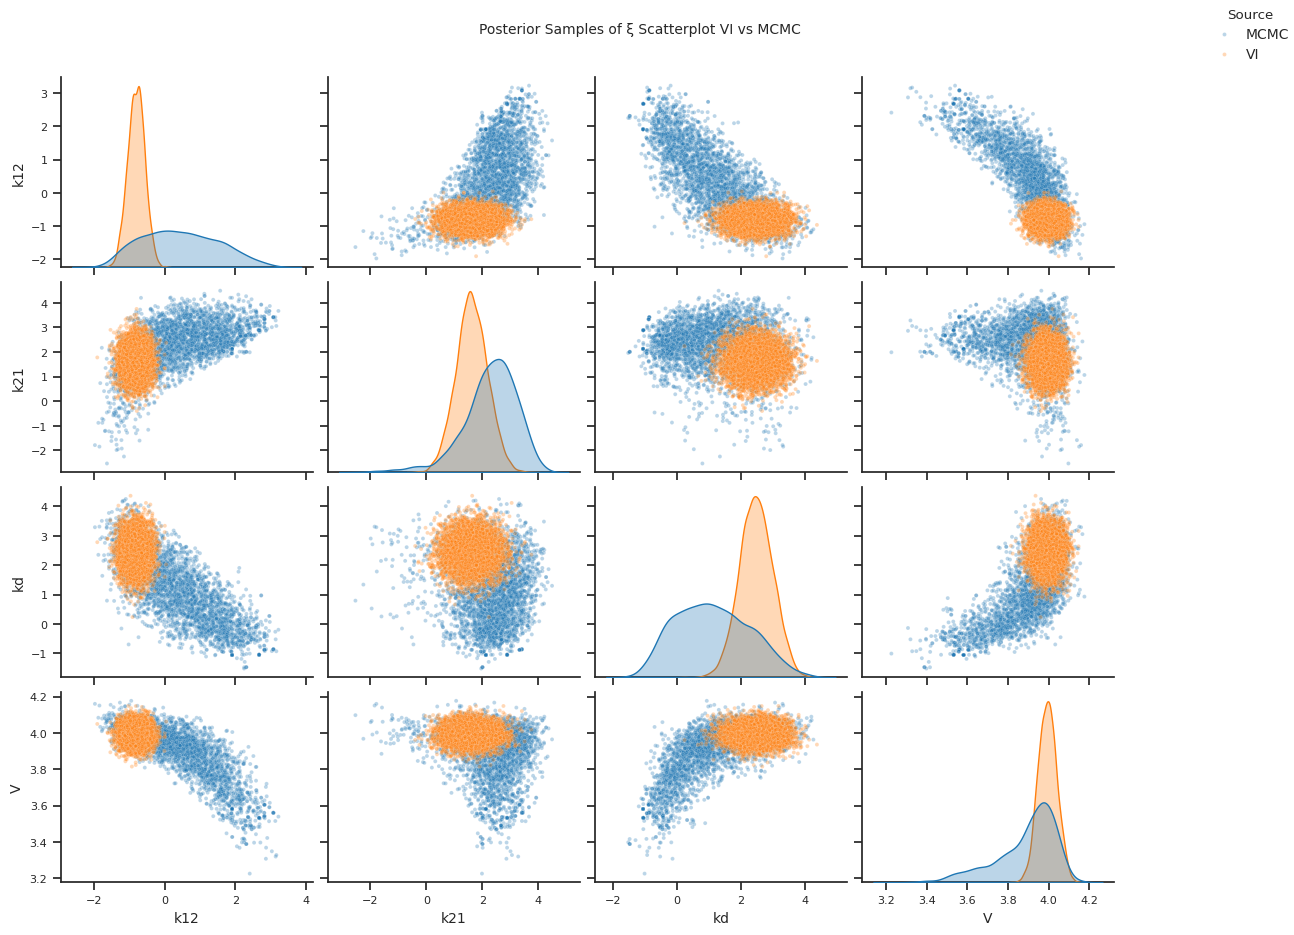

In [29]:
# Collect 5,000 (approximate) posterior samples of ξ from the trained guide.
# Plot all the ξ samples onto a scatterplot matrix. Overlay the MCMC samples from part D. Use transparency so that both VI and MCMC

# Use phi_opt directly
trained_guide = phi_opt

# Draw VI samples
key = jr.PRNGKey(123)
xi_vi_meanfield = trained_guide.sample(key, num_samples=5000)  # → (5000, 4)

# Flatten MCMC samples
samples_mcmc = states.position.transpose(1, 0, 2).reshape(-1, 4)

# Build DataFrame
param_names = ["k12", "k21", "kd", "V"]

df_vi = pd.DataFrame(xi_vi_meanfield, columns=param_names)
df_vi["source"] = "VI"

df_mcmc = pd.DataFrame(samples_mcmc, columns=param_names)
df_mcmc["source"] = "MCMC"

df_all = pd.concat([df_mcmc, df_vi], ignore_index=True)

# Plot
sns.set_context("notebook", font_scale=0.8)
df_sorted = df_all.sort_values(by="source", key=lambda x: x.map({"MCMC": 0, "VI": 1}))
g = sns.pairplot(
    df_sorted,
    hue="source",
    palette={"MCMC": "tab:blue", "VI": "tab:orange"},
    plot_kws={"alpha": 0.3, "s": 8},
    diag_kws={"fill": True, "common_norm": False, "alpha": 0.3},
    corner=False,
    height=1.5
)

for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(labelsize=8)
        ax.xaxis.label.set_size(10)
        ax.yaxis.label.set_size(10)
        ax.title.set_size(7)

g._legend.set_title("Source")
for text in g._legend.texts:
    text.set_fontsize(10)
g._legend.set_bbox_to_anchor((1, 1))

g.fig.set_size_inches(13, 9)
g.fig.suptitle("Posterior Samples of ξ Scatterplot VI vs MCMC", y=1.02, fontsize=10)
g.tight_layout()
plt.show()

How well does mean-field Gaussian VI approximate the posterior?

VI is capturing key aspects of the posterior,but it's not fully replicating the shape or tails of the posterior distribution. VI posterior marginals are sharply peaked and narrower, indicating underestimated uncertainty. MCMC marginals are broader, smoother, and better representative of true posterior uncertainty. MCMC captures complex correlations between parameters



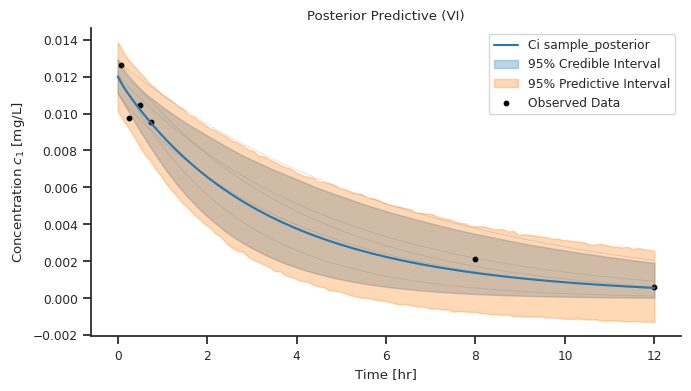

In [30]:
# As in parts B and D, compute the concentration  c1  for each posterior sample,
# over the time interval  [0,12] . Plot the 95% credible interval, 95% predictive
# interval, and a few samples from the posterior.

# Time grid
t_plt = jnp.linspace(0, 12, 100)

xi_dict_vi = {k: xi_vi_meanfield[:, i] for i, k in enumerate(["k12", "k21", "kd", "V"])}
theta_vi_samples = vmap(constrain)(xi_dict_vi)

c1_vi = vmap(solve_pk_iv_bolus, (0, None, None))(theta_vi_samples, t_plt, dosage_mass)

key = jr.PRNGKey(123)
y_vi = c1_vi + sigma * jr.normal(key, shape=c1_vi.shape)

c1_q05, c1_q95 = jnp.quantile(c1_vi, q=jnp.array([0.05, 0.95]), axis=0)
y_q05, y_q95 = jnp.quantile(y_vi, q=jnp.array([0.05, 0.95]), axis=0)

# Plot
plt.figure(figsize=(7, 4))
plt.plot(t_plt, jnp.mean(c1_vi, axis=0), label="Ci sample_posterior", color="tab:blue")
plt.plot(t_plt, c1_vi[:5].T, color="gray", lw=0.5, alpha=0.3)

plt.fill_between(t_plt, c1_q05, c1_q95, color="tab:blue", alpha=0.3, label="95% Credible Interval")
plt.fill_between(t_plt, y_q05, y_q95, color="tab:orange", alpha=0.3, label="95% Predictive Interval")

plt.scatter(times, concentrations, color="black", s=10, label="Observed Data")
plt.xlabel("Time [hr]")
plt.ylabel("Concentration $c_1$ [mg/L]")
plt.title("Posterior Predictive (VI)")
plt.legend()
plt.tight_layout()
sns.despine()
plt.show()


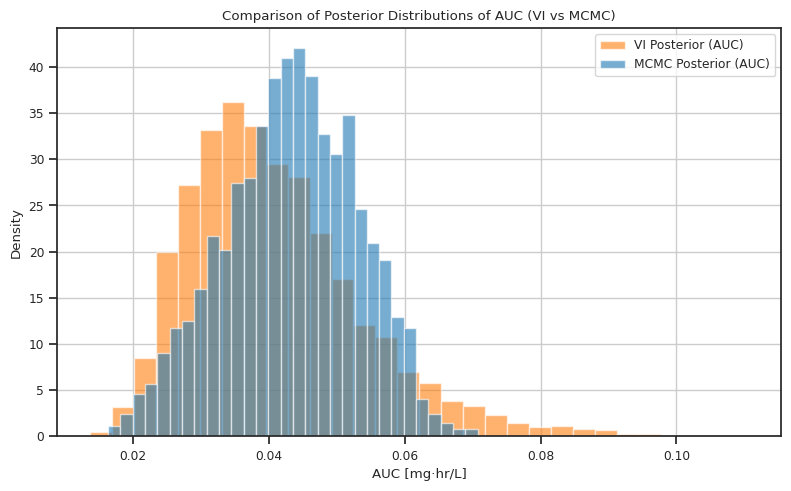

In [31]:
# Plot a histogram of the AUCs of the posterior samples.
# Overlay (with transparency) the AUC histogram from part D (MCMC).
# Do they match?
t_plt = np.linspace(0, 12, 100)

# Recalculate AUC for VI samples
S_vi = 0.5 * np.sum((c1_vi[:, 1:] + c1_vi[:, :-1]) * (t_plt[1:] - t_plt[:-1]), axis=1)

# MCMC samples AUC (previously computed as S)
S_mcmc = np.array(S)

# Plot the histograms
plt.figure(figsize=(8, 5))
plt.hist(S_vi, bins=30, alpha=0.6, density=True, label='VI Posterior (AUC)', color='tab:orange')
plt.hist(S_mcmc, bins=30, alpha=0.6, density=True, label='MCMC Posterior (AUC)', color='tab:blue')
plt.xlabel("AUC [mg·hr/L]")
plt.ylabel("Density")
plt.title("Comparison of Posterior Distributions of AUC (VI vs MCMC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Note, we have sample size differences between (VI and MCMC) so, mormalizing to density to compare relative shapes and distributions was logical.While the distributions broadly match in shape and general range, the VI approximation slightly underestimates the AUC values compared to the more accurate MCMC posterior, because mean-field VI often underestimates uncertainty and can bias posterior estimates, as opposed to MCMC.

## Part F - Variational inference with full-rank Gaussian guide

**Do the following:**
- Construct a full-rank multivariate Gaussian guide

$$
\begin{align*}
q_\phi(\xi) &=\mathcal{N}(\xi| \mu_\phi, \Sigma_\phi) \\
\Sigma_\phi &= L_\phi L_\phi^T \\
\end{align*}
$$
&emsp;&emsp;&ensp;where $L_\phi$ is a lower-triangular matrix parameterized by $\phi$.

- Repeat the steps from part E (including the plots) using the new guide.
- How do the full-rank and mean-field VI approximations compare?

**Your answer here:** <br><br> Ref- https://predictivesciencelab.github.io/advanced-scientific-machine-learning/inverse/vi/02_catalysis.html resusing.

In [32]:
# Reusung example class for full rank gaussian guide

class FullRankGaussianGuide(eqx.Module):
    """Class that represents a multivariate normal guide with variational parameters phi."""
    guide_params: jnp.ndarray
    num_model_params: int = eqx.field(static=True, default=None)

    def __post_init__(self):
        if self.guide_params.shape[0] != self.get_num_guide_params(self.num_model_params):
            raise ValueError("The length of phi is not consistent with the number of parameters.")

    def logprob(self, model_params):
        """The log probability density of the guide."""
        return jax.scipy.stats.multivariate_normal.logpdf(model_params, self.mu, self.Sigma)

    def sample(self, key, num_samples):
        """Samples from the guide."""
        return jr.multivariate_normal(key, self.mu, self.Sigma, shape=(num_samples,))

    def forward(self, epsilon):
        """Transforms a multivariate normal sample to a sample from the guide, as per the reparameterization trick."""
        return self.mu + jnp.dot(self.L, epsilon)

    @property
    def mu(self):
        """The mean of the guide."""
        return self.guide_params[:self.num_model_params]

    @property
    def Sigma(self):
        """The covariance of the guide."""
        L = self.L
        return jnp.dot(L, L.T)

    @property
    def L(self):
        """The Cholesky decomposition of the covariance of the guide."""
        # The diagonal
        ell = jnp.exp(self.guide_params[self.num_model_params:2*self.num_model_params])
        L = jnp.diag(ell)

        # The lower triangular part
        L = L.at[jnp.tril_indices(self.num_model_params, -1)].set(self.guide_params[2*self.num_model_params:])
        return L

    @classmethod
    def from_mean_covariance(cls, mu, Sigma):
        """Constructs a guide with a given mean and covariance. Useful for initializing phi to a reasonable value."""
        L = jnp.linalg.cholesky(Sigma)
        ell = jnp.diag(L)
        tri = L[jnp.tril_indices(L.shape[0], -1)]
        guide_params = jnp.hstack([mu, jnp.log(ell), tri])
        return cls(guide_params, mu.shape[0])

    @staticmethod
    def get_num_guide_params(num_model_params):
        """Return the number of guide parameters there are."""
        num_mu_params = num_model_params
        num_L_params = num_model_params*(num_model_params + 1)//2
        return num_mu_params + num_L_params

num_guide_params = FullRankGaussianGuide.get_num_guide_params(num_model_params=4)

# Model keyword args needed inside ELBO
model_kwargs = {
    "times": times,
    "concentrations": concentrations,
    "dosage_mass": dosage_mass,
    "sigma": sigma
}


def unflatten_params(vec):
  return {"k12": vec[0], "k21": vec[1], "kd": vec[2], "V": vec[3]}

def minus_log_post(x, **kwargs):
  xi = unflatten_params(x)
  return -log_posterior(xi, **kwargs)

# Minimizing the negative ELBO is equivalent to maximizing the ELBO.
def neg_elbo(guide_params, epsilon, model_kwargs, num_model_params):
    """The integrand of the negative reparameterized ELBO, f(g_phi(xi)).

    Parameters
    ----------
    guide_params : jnp.ndarray
        The guide parameters. (Denoted as ϕ in the notes.)
    epsilon : jnp.ndarray
        The standard Gaussian sample to be transformed to a guide sample.
    model_kwargs : dict
        The keyword arguments for the model.
    num_model_params : int
        The number of model parameters. (The dimension of x in the notes.)

    Returns the negative ELBO.
    """
    q = FullRankGaussianGuide(guide_params=guide_params, num_model_params=num_model_params)
    x = q.forward(epsilon)

    return minus_log_post(x, **model_kwargs) + q.logprob(x)


D = 4
map_mu   = flatten_dict(xi_map)
init_S   = jnp.eye(D) * 0.1
q0       = FullRankGaussianGuide.from_mean_covariance(map_mu, init_S)
phi0     = q0.guide_params

optim    = optax.adam(1e-3)
opt_state = optim.init(phi0)
key       = jr.PRNGKey(0)

# one VI step
@partial(jit, static_argnums=(3,4))
def step(phi, opt_state, key, batch_size, D):
  key, subkey = jr.split(key)
  eps_batch   = jr.normal(subkey, shape=(batch_size, D))
  vals, grads = vmap(value_and_grad(neg_elbo),
                      in_axes=(None, 0, None, None)
                    )(phi, eps_batch, model_kwargs, D)
  g = jnp.mean(grads, axis=0)
  loss = jnp.mean(vals)
  updates, opt_state = optim.update(g, opt_state)
  phi = optax.apply_updates(phi, updates)
  return (phi, opt_state, key), loss, jnp.linalg.norm(g)


# Hyper‑params
batch_size   =  20
num_iter     = 40000
report_every =   500

# Initialize
map_mu    = flatten_dict(xi_map)
init_cov  = jnp.eye(num_model_params) * 0.1
q_init    = FullRankGaussianGuide.from_mean_covariance(map_mu, init_cov)
params    = q_init.guide_params
opt_state = optim.init(params)
key       = jr.PRNGKey(0)


phi, opt_state, key = phi0, opt_state, key
loss_hist, grad_norms = [], []

# Training loop
for i in range(1, num_iter+1):
    (phi, opt_state, key), neg_val, gnorm = step(phi, opt_state, key, batch_size, D)
    loss_hist.append(neg_val)
    grad_norms.append(gnorm)
    if i % report_every == 0:
        print(f"Iter {i:4d}/{num_iter:4d}  ELBO: {-neg_val:.2f}  ∥∇ELBO∥: {gnorm:.2e}")

# Extract final guide
q_final = FullRankGaussianGuide(phi, D)
neg_elbo_arr = jnp.array(loss_hist)

Iter  500/40000  ELBO: 18.67  ∥∇ELBO∥: 3.86e+01
Iter 1000/40000  ELBO: 22.68  ∥∇ELBO∥: 3.60e+01
Iter 1500/40000  ELBO: 23.69  ∥∇ELBO∥: 3.82e+01
Iter 2000/40000  ELBO: 26.40  ∥∇ELBO∥: 3.70e+01
Iter 2500/40000  ELBO: 27.67  ∥∇ELBO∥: 2.63e+01
Iter 3000/40000  ELBO: 27.91  ∥∇ELBO∥: 2.87e+01
Iter 3500/40000  ELBO: 28.65  ∥∇ELBO∥: 2.17e+01
Iter 4000/40000  ELBO: 28.41  ∥∇ELBO∥: 3.70e+00
Iter 4500/40000  ELBO: 28.50  ∥∇ELBO∥: 1.10e+01
Iter 5000/40000  ELBO: 28.59  ∥∇ELBO∥: 4.57e+00
Iter 5500/40000  ELBO: 28.68  ∥∇ELBO∥: 1.99e+01
Iter 6000/40000  ELBO: 28.62  ∥∇ELBO∥: 8.30e+00
Iter 6500/40000  ELBO: 28.85  ∥∇ELBO∥: 1.55e+01
Iter 7000/40000  ELBO: 28.58  ∥∇ELBO∥: 1.61e+01
Iter 7500/40000  ELBO: 28.59  ∥∇ELBO∥: 1.97e+01
Iter 8000/40000  ELBO: 28.73  ∥∇ELBO∥: 1.73e+01
Iter 8500/40000  ELBO: 28.66  ∥∇ELBO∥: 2.18e+01
Iter 9000/40000  ELBO: 28.64  ∥∇ELBO∥: 1.13e+01
Iter 9500/40000  ELBO: 28.89  ∥∇ELBO∥: 8.29e+00
Iter 10000/40000  ELBO: 28.81  ∥∇ELBO∥: 1.71e+01
Iter 10500/40000  ELBO: 28.63  ∥∇ELBO∥:

Optimized Guide Parameters (mean ± std):
k12 :   0.3883 ± 0.7461
k21 :   2.4770 ± 0.6931
kd  :   1.1665 ± 0.7868
V   :   3.9276 ± 0.0917

Convergence Analysis
Initial ELBO: -18.0942
Final ELBO:  28.9556
Improvement :  47.0497
  Change over last 100 iters: -0.038446
ELBO has effectively converged (drift < 0.1)


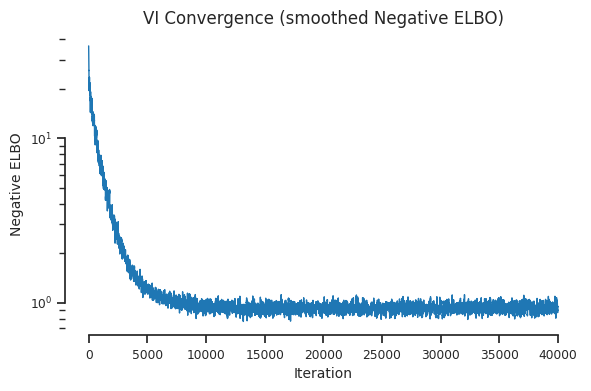

In [33]:
# Helper to go from vector → dict
def unflatten_params(vec):
    return {"k12": vec[0], "k21": vec[1], "kd": vec[2], "V": vec[3]}

neg_elbo_arr = jnp.array(loss_hist)

# Extract marginals from full‑rank guide
mu_opt     = q_final.mu
sigma_opt  = jnp.sqrt(jnp.diag(q_final.Sigma))

# Print optimized parameters
print("Optimized Guide Parameters (mean ± std):")
opt_means = unflatten_params(mu_opt)
opt_stds  = unflatten_params(sigma_opt)
for name in ["k12","k21","kd","V"]:
    m = opt_means[name]
    s = opt_stds[name]
    print(f"{name:4s}: {m:8.4f} ± {s:6.4f}")

# Convergence analysis
initial_elbo = -neg_elbo_arr[0]
final_elbo   = -neg_elbo_arr[-1]
improvement  = final_elbo - initial_elbo

print("\nConvergence Analysis")
print(f"Initial ELBO: {initial_elbo:8.4f}")
print(f"Final ELBO: {final_elbo:8.4f}")
print(f"Improvement : {improvement:8.4f}")

window = min(100, len(neg_elbo_arr)//5)
if len(neg_elbo_arr) > 2*window:
    recent_change = jnp.mean(-neg_elbo_arr[-window:]) - jnp.mean(-neg_elbo_arr[-2*window:-window])
    print(f"  Change over last {window} iters: {recent_change: .6f}")
    if jnp.abs(recent_change) < 1e-1:
        print("ELBO has effectively converged (drift < 0.1)")
    else:
        print("ELBO may still be drifting.")

# Smoothed plot of negative ELBO
fig, ax = plt.subplots(figsize=(6,4))
w = 20
baseline = float(neg_elbo_arr.min())
sm = np.convolve(np.array(neg_elbo_arr - baseline), np.ones(w)/w, mode="valid")
ax.plot(sm, lw=1)
ax.set_yscale("log")
ax.set_title("VI Convergence (smoothed Negative ELBO)", fontsize=12)
ax.set_xlabel("Iteration", fontsize=10)
ax.set_ylabel("Negative ELBO", fontsize=10)
sns.despine(trim=True)
plt.tight_layout()
plt.show()

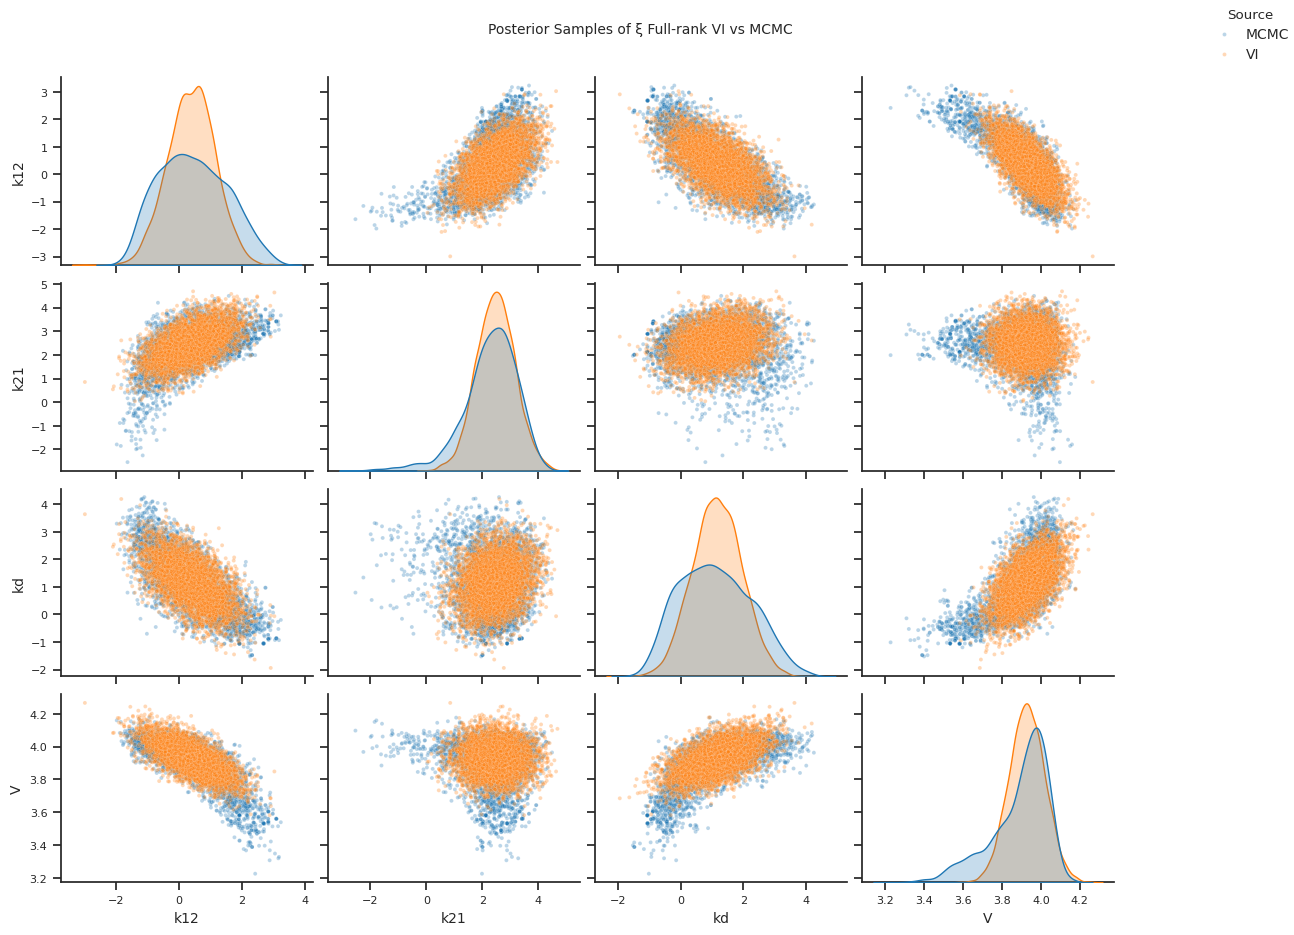

In [34]:
# Collect 5,000 (approximate) posterior samples of ξ from the trained guide.
# Plot all the ξ samples onto a scatterplot matrix. Overlay the MCMC samples from part D. Use transparency so that both VI and MCMC

q_vi = q_final

# Draw VI samples
key = jr.PRNGKey(123)
xi_vi_fullrank = q_vi.sample(key, num_samples=5000)

# Flatten MCMC samples
samples_mcmc = states.position.transpose(1, 0, 2).reshape(-1, 4)

# Build DataFrame
param_names = ["k12", "k21", "kd", "V"]
df_vi = pd.DataFrame(xi_vi_fullrank, columns=param_names)
df_vi["source"] = "VI"

df_mcmc = pd.DataFrame(samples_mcmc, columns=param_names)
df_mcmc["source"] = "MCMC"

df_all = pd.concat([df_mcmc, df_vi], ignore_index=True)

# Plot
sns.set_context("notebook", font_scale=0.8)
df_sorted = df_all.sort_values(by="source", key=lambda x: x.map({"MCMC": 0, "VI": 1}))
g = sns.pairplot(
    df_sorted,
    hue="source",
    palette={"MCMC": "tab:blue", "VI": "tab:orange"},
    plot_kws={"alpha": 0.3, "s": 8},
    diag_kws={"fill": True, "common_norm": False},
    corner=False,
    height=1.5
)

for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(labelsize=8)
        ax.xaxis.label.set_size(10)
        ax.yaxis.label.set_size(10)
        ax.title.set_size(7)

g._legend.set_title("Source")
for text in g._legend.texts:
    text.set_fontsize(10)
g._legend.set_bbox_to_anchor((1, 1))

g.fig.set_size_inches(13, 9)
g.fig.suptitle("Posterior Samples of ξ Full‑rank VI vs MCMC", y=1.02, fontsize=10)
g.tight_layout()
plt.show()

How well does mean-field Gaussian VI approximate the posterior?

The Full-Rank Gaussian VI method is very good approximation to the posterior obtained by MCMC. Unlike mean-field VI, the Full-Rank Gaussian approach captures complex correlations and accurately represents the shape and uncertainty of the posterior distribution. The approximation closely matches the MCMC posterior visually, indicating that Full-Rank Gaussian VI is a reliable and accurate method.

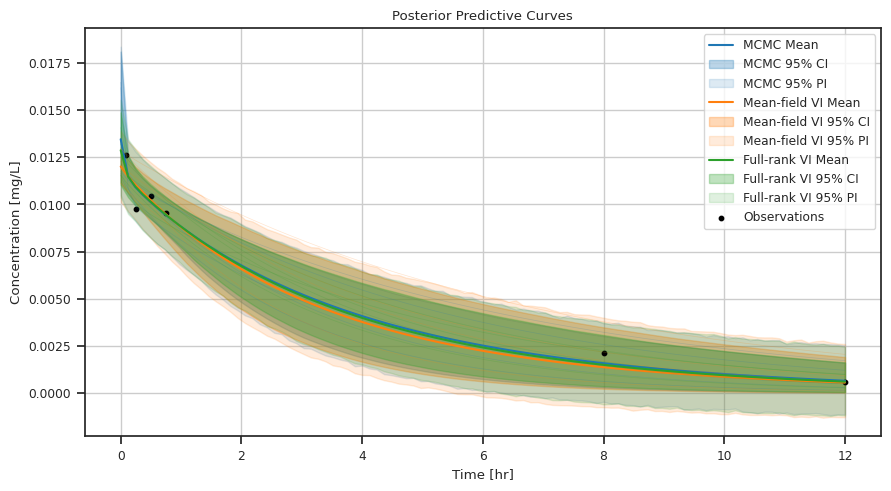

In [42]:
# Convert posterior samples to constrained space
theta_mcmc       = vmap(constrain)({k: samples_mcmc[:, i] for i, k in enumerate(param_names)})
theta_meanfield  = vmap(constrain)({k: xi_vi_meanfield[:, i] for i, k in enumerate(param_names)})
theta_fullrank   = vmap(constrain)({k: xi_vi_fullrank[:, i] for i, k in enumerate(param_names)})

# Solve PK model
t_plt = jnp.linspace(0, 12, 100)
c1_mcmc      = vmap(solve_pk_iv_bolus, (0, None, None))(theta_mcmc, t_plt, dosage_mass)
c1_meanfield = vmap(solve_pk_iv_bolus, (0, None, None))(theta_meanfield, t_plt, dosage_mass)
c1_fullrank  = vmap(solve_pk_iv_bolus, (0, None, None))(theta_fullrank, t_plt, dosage_mass)

# Add aleatoric noise
key = jr.PRNGKey(42)
y_mcmc      = c1_mcmc + sigma * jr.normal(key, shape=c1_mcmc.shape)
y_meanfield = c1_meanfield + sigma * jr.normal(key, shape=c1_meanfield.shape)
y_fullrank  = c1_fullrank + sigma * jr.normal(key, shape=c1_fullrank.shape)

# Interval computation
def get_intervals(c1, y):
    c1_q05, c1_q95 = jnp.quantile(c1, jnp.array([0.05, 0.95]), axis=0)
    y_q05, y_q95   = jnp.quantile(y,  jnp.array([0.05, 0.95]), axis=0)
    return c1_q05, c1_q95, y_q05, y_q95

ci_mcmc      = get_intervals(c1_mcmc, y_mcmc)
ci_meanfield = get_intervals(c1_meanfield, y_meanfield)
ci_fullrank  = get_intervals(c1_fullrank, y_fullrank)

# Plotting
def plot_predictive(t, c1, intervals, label, color):
    c1_q05, c1_q95, y_q05, y_q95 = intervals
    plt.plot(t, jnp.mean(c1, axis=0), label=f'{label} Mean', color=color)
    plt.plot(t, c1[:5].T, color=color, alpha=0.2, lw=0.5)
    plt.fill_between(t, c1_q05, c1_q95, color=color, alpha=0.3, label=f'{label} 95% CI')
    plt.fill_between(t, y_q05, y_q95, color=color, alpha=0.15, label=f'{label} 95% PI')

plt.figure(figsize=(9, 5))
plot_predictive(t_plt, c1_mcmc, ci_mcmc, "MCMC", "tab:blue")
plot_predictive(t_plt, c1_meanfield, ci_meanfield, "Mean-field VI", "tab:orange")
plot_predictive(t_plt, c1_fullrank, ci_fullrank, "Full-rank VI", "tab:green")

plt.scatter(times, concentrations, s=10, color="black", label="Observations")
plt.xlabel("Time [hr]")
plt.ylabel("Concentration [mg/L]")
plt.title("Posterior Predictive Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


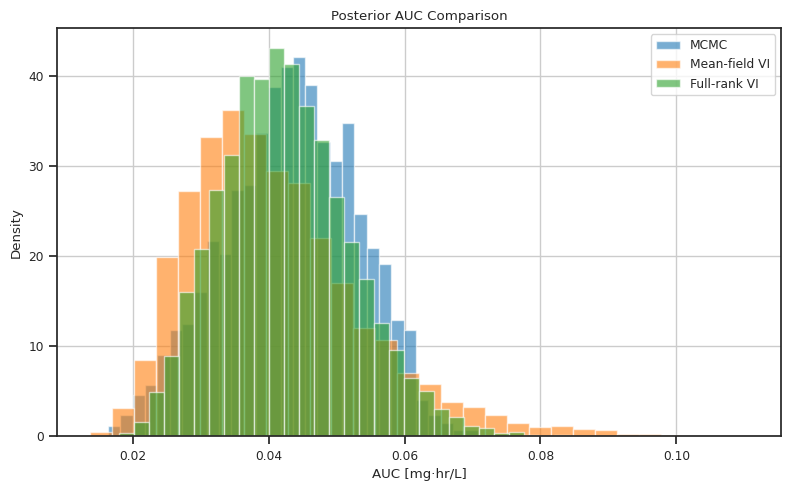

In [43]:
def compute_auc(c1, t):
    return 0.5 * jnp.sum((c1[:, 1:] + c1[:, :-1]) * (t[1:] - t[:-1]), axis=1)

S_mcmc      = compute_auc(c1_mcmc, t_plt)
S_meanfield = compute_auc(c1_meanfield, t_plt)
S_fullrank  = compute_auc(c1_fullrank, t_plt)

plt.figure(figsize=(8, 5))
plt.hist(S_mcmc, bins=30, alpha=0.6, density=True, label="MCMC", color="tab:blue")
plt.hist(S_meanfield, bins=30, alpha=0.6, density=True, label="Mean-field VI", color="tab:orange")
plt.hist(S_fullrank, bins=30, alpha=0.6, density=True, label="Full-rank VI", color="tab:green")
plt.xlabel("AUC [mg·hr/L]")
plt.ylabel("Density")
plt.title("Posterior AUC Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Compute AUCs
def compute_auc(c1_samples, t_plt):
    dt = t_plt[1:] - t_plt[:-1]
    auc = 0.5 * jnp.sum((c1_samples[:, 1:] + c1_samples[:, :-1]) * dt, axis=1)
    return auc

auc_mcmc      = compute_auc(c1_mcmc, t_plt)
auc_meanfield = compute_auc(c1_meanfield, t_plt)
auc_fullrank  = compute_auc(c1_fullrank, t_plt)
print(f"AUC MCMC:      mean={auc_mcmc.mean():.4f}, std={auc_mcmc.std():.4f}")
print(f"AUC MeanField: mean={auc_meanfield.mean():.4f}, std={auc_meanfield.std():.4f}")
print(f"AUC FullRank:  mean={auc_fullrank.mean():.4f}, std={auc_fullrank.std():.4f}")